<a href="https://colab.research.google.com/github/fontanads/machine_learning/blob/master/pytorch_labs/Introdu%C3%A7%C3%A3o_ao_PyTorch_da_Regress%C3%A3o_Linear_%C3%A0_NLP_com_word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tutorial elaborado por [Bruno Fontana da Silva](https://github.com/fontanads). 

# Sumário
- [Introdução ao PyTorch](#0)
- [Parte 1: Básico sobre Tensores](#1)
    - [1.1 Criando Tensores ](#11)
    - [1.1 Inicializando Tensores ](#12)
    - [1.1 Tensores com números aleatórios](#13)
    - [1.1 Atributos de Tensores](#14)
    - [1.1 Slicing e Operações](#15)
- [Parte 2:  Implementando a regressão linear](#2)
    - [2.1  Dataset Artificial](#21)
    - [2.2  Modelo do Perceptron](#22)
    - [2.3  Classe do Modelo de Rede Neural](#23)
    - [2.4  Usando o Modelo Existente](#24)
    - [2.5  Critério de Avaliação do Treinamento](#25)
    - [2.6  Otimizador dos parâmetros](#26)
    - [2.7  Treinando o modelo](#27)
    - [2.8  Avaliando o resultado do treino](#28)
- [Parte 3:  Aprendendo a Função X-OR com a regressão logística](#3)
    - [3.1  Dataset da Função X-OR](#31)
    - [3.2  Camada linear com ativação sigmóide (regressão logística)](#32)
    - [3.3  Função custo/perda: binary cross-entropy (BCE)](#33)
    - [3.4  Treinando a regressão logística ](#34)
    - [3.5  Feature engineering ](#35)
- [Parte 4: Redes com mais camadas](#4)
- [Parte 5:  NLP e Embedding Layers](#5)
    - [5.1  Variáveis Categóricas](#51)
    - [5.2  One-hot encoding](#52)
    - [5.3  Embedding Layer](#53)
    - [5.4  Embedding Layer no PyTorch](#54)
    - [5.5  Dataset de e-mails de SPAM](#55)
    - [5.6  Limpeza de texto e Vocabulário](#56)
    - [5.7  Codificação do texto](#57)
    - [5.8  Datasets de Treino e Teste](#58)
    - [5.9  Modelo Classificador de SPAM](#59)
    - [5.10  Treinamento do Modelo](#591)
    - [5.11  Avaliação do Modelo com dataset de Teste](#592)
    - [5.12  Visualizando Word-Embeddings](#593)
    - [5.10  Encontrando palavras vizinhas](#594)


In [1]:
from time import sleep
from IPython import display
import pylab as pl
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection  import train_test_split

In [3]:
import nltk
from nltk.corpus import stopwords 

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# Valores padronizados para tamanho de fontes em gráficos
SMALL_SIZE = 16
MEDIUM_SIZE = 24
BIGGER_SIZE = 30

# Método para configurar as fontes de um gráfico com base nos valores padronizados 
def set_fontsizes_in_plot():
    plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

<a name="0"></a>
# 1. Introdução ao PyTorch

Vamos importar o framework PyTorch e utilizá-lo para construir e treinar redes neurais.  
Antes disso, é importante saber que existem diversos frameworks bastante utilizados, em diferentes contextos. Por exemplo:
- [Theano (obsoleto)](http://deeplearning.net/software/theano/): foi um dos primeiros frameworks que permitia computação eficiente de cálculos com vetores e matrizes utilizando CPUs e GPUs.
- [Tensorflow](https://www.tensorflow.org/): é um dos _backends_ que substituiu o Theano; desenvolvido pela Google, o Tensorflow é uma ferramenta poderosa para operar cálculos sobre grafos, e é amplamente utilizado no desenvolvimento e _deploy_ de modelos de _deep learning_. Recentemente, a versão 2.0 absorveu a API [Keras](https://keras.io/), que é uma abstração de mais alto nível para a construção de modelos de redes neurais profundas.
- [Trax](https://trax-ml.readthedocs.io/en/latest/) é uma biblioteca mantida pelo time da Google Brain que busca abstrair ainda mais os códigos de deep learning, tornando o processo mais veloz e a implementação mais simples, em alto nível. Para otimizar a velocidade de processamento dos cálculos em GPUs/TPUs, o trax usa uma versão aprimorada do NumPy, chamada [JAX](https://github.com/google/jax).
- [Caffe](https://caffe.berkeleyvision.org/) é um framework desenvolvido pelo grupo _Berkeley Artificial Intelligence Research_ (BAIR). Apesar de ter uma interface em Python, o framework é escrito em C++ e também possui uma API de baixo nível para C++. As applicações com Caffe são, em maioria, na área de visão computacional.



Finalment temos o [PyTorch](https://pytorch.org/), um framework mantido pelo time de inteligência artifical do Facebook.  

Recentemente, o PyTorch ganhou muita atenção da comunidade acadêmica de pesquisa, principalmente por ser muito mais flexível do que o seu maior competidor, o TensorFlow 1.0, quando se torna necessário personalizar as camadas e operações realizadas numa rede neural.  

Mesmo com a chegada do Tensorflow 2.0 (incluindo a integração com o Keras), o PyTorch continua crescendo em uso e adoção (veja [este post](https://towardsdatascience.com/pytorch-vs-tensorflow-in-2020-fe237862fae1) mais recente comparando a situação da competição PyTorch vs. Tensorflow em 2020, observando que hoje em dia há pouca diferença em termos de implementação)

Agora sim, após esse contexto, vamos aprender como utilizar o PyTorch. Como recomendação, tente fazer as mesmas tarefas daqui usando o TensorFlow. :)

In [5]:
import torch

Vamos verificar a versão do PyTorch, e também do CUDA (suporte para processamento em GPU) relacionado.

In [6]:
torch.__version__

'1.6.0+cu101'

<a name="1"></a>
## Preliminares: Tensores

Assim como o pacote NumPy utiliza numpy-arrays como objeto para otimizar operações matemáticas utilizando as funções da sua biblioteca, os cálculos sobre grafos (ou seja, sobre redes neurais) também precisam de um tipo de objeto particular.  

São os tensores. Um tensor nada mais é do que uma generalização dos conceitos de vetores/matrizes para espaços multidimensionais. Sua propriedade mais importante é se comportar como uma "entidade" que consegue se relacionar com outras entidades e sofrer transformações.

<a name="11"></a>
### Criando tensores

Criando tensores a partir de arrays numpy:

In [7]:
x = np.array([1,2,3,4])
print(type(x), x.dtype, x, sep='\n')

<class 'numpy.ndarray'>
int64
[1 2 3 4]


In [8]:
X = torch.from_numpy(x) # np.ndarray para torch-tensor
print(type(X), X.dtype, X, sep='\n')

<class 'torch.Tensor'>
torch.int64
tensor([1, 2, 3, 4])


Criando tensores independentes das arrays numpy:

In [9]:
X_copy = torch.tensor(x)
print(type(X_copy), X_copy.dtype, X_copy, sep='\n')

<class 'torch.Tensor'>
torch.int64
tensor([1, 2, 3, 4])


Em resumo:
- `torch.from_numpy()` e `torch.as_tensor()` usam a mesma memória (instância), portanto uma alteração em um deles causa uma alteração no outro    

- ``torch.tensor()`` faz uma cópia independente do array de entrada

In [10]:
x[3] = -100
print(f' numpy x: {x}, \n tensor X (from numpy): {X}, \n tensor X_copy: {X_copy}' )

 numpy x: [   1    2    3 -100], 
 tensor X (from numpy): tensor([   1,    2,    3, -100]), 
 tensor X_copy: tensor([1, 2, 3, 4])


Outros construtores da classe 'tensor' são:

In [11]:
torch.FloatTensor([1,2,3,4]) # equivalente a torch.Tensor()

tensor([1., 2., 3., 4.])

In [12]:
torch.LongTensor([1.1, 2.054, 3.141516, 4.]) # equivalenta a torch.tensor([1,2,3,4], dtype=torch.long)

tensor([1, 2, 3, 4])

<a name="12"></a>
### Inicializando Tensores

Tensores "vazios":

In [13]:
torch.empty(size=(4,10) )

tensor([[1.2186e-35, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]])

Tensores de uns e zeros (às vezes são chamados de "máscaras"):

In [14]:
torch.ones(size=(3,4))

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [15]:
torch.zeros(size=(2,5))

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

Em vez de usar as dimensões (size, shape) como entrada, podemos "exemplificar" com outro tensor já existente:

In [16]:
torch.ones_like(X_copy,dtype=torch.float)

tensor([1., 1., 1., 1.])

In [17]:
torch.zeros_like(X_copy)

tensor([0, 0, 0, 0])

**Sequências** ``[início, fim)`` com passo fixo (número de elementos calculado):

In [18]:
torch.arange(start=-10, end=11, step=2)

tensor([-10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8,  10])

**Sequências** com $n$ elementos igualmente espaçados entre ``[início, fim)`` (passo calculado):

In [19]:
torch.linspace(start=0, end=10, steps=21)

tensor([ 0.0000,  0.5000,  1.0000,  1.5000,  2.0000,  2.5000,  3.0000,  3.5000,
         4.0000,  4.5000,  5.0000,  5.5000,  6.0000,  6.5000,  7.0000,  7.5000,
         8.0000,  8.5000,  9.0000,  9.5000, 10.0000])

Também podemos usar ``reshape`` e ``view`` para mudar as dimensões dos tensores:

In [20]:
torch.linspace(start=0, end=10, steps=21).reshape(shape=(-1,3))

tensor([[ 0.0000,  0.5000,  1.0000],
        [ 1.5000,  2.0000,  2.5000],
        [ 3.0000,  3.5000,  4.0000],
        [ 4.5000,  5.0000,  5.5000],
        [ 6.0000,  6.5000,  7.0000],
        [ 7.5000,  8.0000,  8.5000],
        [ 9.0000,  9.5000, 10.0000]])

In [21]:
torch.linspace(start=0, end=10, steps=21).view(size=(-1,3))

tensor([[ 0.0000,  0.5000,  1.0000],
        [ 1.5000,  2.0000,  2.5000],
        [ 3.0000,  3.5000,  4.0000],
        [ 4.5000,  5.0000,  5.5000],
        [ 6.0000,  6.5000,  7.0000],
        [ 7.5000,  8.0000,  8.5000],
        [ 9.0000,  9.5000, 10.0000]])

desde que sempre sejam mantidos o número total de elementos!

<a name="13"></a>
### Tensores com números aleatórios

Semente fixa (para reproduzir os resultados):

In [22]:
torch.manual_seed(42)

Cada elemento segue uma distribuição uniforme (valores entre $0$ e $1$, com a mesma probabilidade de serem gerados):

In [23]:
torch.rand(1, 7)

tensor([[0.8823, 0.9150, 0.3829, 0.9593, 0.3904, 0.6009, 0.2566]])

Cada elemento segue uma distribuição Gaussiana normal (média em $0$, desvio padrão $1$)

In [24]:
torch.randn(1,7)

tensor([[-0.2147,  0.2989, -0.0107, -1.2492, -1.2284,  0.5294,  1.2211]])

Números inteiros, sorteados aleatoriamente (com a mesma probabilidade) entre $a$ (`low`) e $b$ (`high`) (*valor superior não inclusivo*).

In [25]:
torch.randint(low=0, high=4, size=(5,5))

tensor([[3, 3, 1, 1, 1],
        [3, 3, 0, 0, 3],
        [1, 1, 0, 3, 0],
        [0, 2, 2, 2, 1],
        [3, 3, 3, 3, 2]])

Também podemos criar tensores aleatórios exemplificando com as dimensões de um outro tensor existente.

In [26]:
X0 = torch.arange(0, 12, dtype=torch.float64).view(size=(3,-1))
X0

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]], dtype=torch.float64)

In [27]:
X1 = torch.randn_like(X0)
X1

tensor([[ 0.1511,  0.2815,  0.0562,  0.5227],
        [-0.2384, -0.0499,  0.5263, -0.0085],
        [ 0.7291,  0.1331,  0.8640, -1.0157]], dtype=torch.float64)

<a name="14"></a>
### Atributos de tensores

``shape`` é um atributo de um tensor, enquanto ``size()`` é um método que retorna esse atributo como saída

In [28]:
X1.shape

torch.Size([3, 4])

In [29]:
X1.size()

torch.Size([3, 4])

``device`` é um atributo que indica se o tensor está rodando sobre uma CPU ou GPU

In [30]:
X1.device

device(type='cpu')

In [31]:
# cuda

<a name="15"></a>
### Slicing e Operações

Slicing funciona similar ao numpy:

In [32]:
print('X1:', X1, sep='\n')
print(f'shape de X1: {X1.shape}')
print(f'Linha 0 de X1: {X1[0]}')
print(f'Coluna 0 de X1: {X1[:, 0]}')
print(f'Elemento da Linha 2, Coluna 1 de X1: {X1[2, 1]}')

X1:
tensor([[ 0.1511,  0.2815,  0.0562,  0.5227],
        [-0.2384, -0.0499,  0.5263, -0.0085],
        [ 0.7291,  0.1331,  0.8640, -1.0157]], dtype=torch.float64)
shape de X1: torch.Size([3, 4])
Linha 0 de X1: tensor([0.1511, 0.2815, 0.0562, 0.5227], dtype=torch.float64)
Coluna 0 de X1: tensor([ 0.1511, -0.2384,  0.7291], dtype=torch.float64)
Elemento da Linha 2, Coluna 1 de X1: 0.1331419636369182


Vamos criar dois tensores em formato de vetor linha, $\mathbf{v}_1$ e $\mathbf{v}_2$, com dimensões $1 \times n_{\text{c}}$, sendo $n_c$ o número de colunas.

In [33]:
v1 = torch.arange(3,0,-1, dtype=torch.float64).view(size=(-1,3))
v2 = torch.from_numpy(np.array([1,0,-1])).view(size=(-1,3)).type(torch.float64)
print('v1', v1,v1.shape)
print('v2', v2, v2.shape)

v1 tensor([[3., 2., 1.]], dtype=torch.float64) torch.Size([1, 3])
v2 tensor([[ 1.,  0., -1.]], dtype=torch.float64) torch.Size([1, 3])


Algumas **operações binárias elemento a elemento**, entre *tensores de dimensões idênticas*:

In [34]:
v1+v2

tensor([[4., 2., 0.]], dtype=torch.float64)

In [35]:
v1-v2

tensor([[2., 2., 2.]], dtype=torch.float64)

In [36]:
v1*v2

tensor([[ 3.,  0., -1.]], dtype=torch.float64)

In [37]:
v1/v2

tensor([[ 3., inf, -1.]], dtype=torch.float64)

In [38]:
v1**v2

tensor([[3., 1., 1.]], dtype=torch.float64)

Para realizar **operações matriciais** (em duas dimensões), precisamos respeitar a regra de que o número de colunas da matriz à esquerda tem que ser o mesmo número de linhas da matriz à direita.

Seja $A$ uma matriz com $m$ linhas e $n$ colunas e $B$ uma matriz com $n$ linhas e $p$ colunas, temos que:

$A_{m \times n}$ $\times$ $B_{n \times p}$ = $C_{m \times p}$ 

resulta na matriz $C$ com $m$ linhas e $p$ colunas.  
Note que o número de colunas de $A$, matriz à esquerda da multiplicação, é idêntico ao número de linhas de $B$, matriz à direita da multiplicação, portanto é possível realizar a operação.

In [39]:
print(f' shape de v1: {v1.shape}')
print(f' shape de v2 tranposto: {v2.T.shape}')
print(f' # de colunas de v1 é igual ao # de linhas de v2.T? {v1.shape[1] == v2.T.shape[0]}')
print(f' v1 multiplicando matricialmente v2.T: {v1@v2.T}')  # torch.dot(v1, v2.T)
print(f' dimensões do resultado {v1.shape[0]} x {v2.T.shape[1]}')

 shape de v1: torch.Size([1, 3])
 shape de v2 tranposto: torch.Size([3, 1])
 # de colunas de v1 é igual ao # de linhas de v2.T? True
 v1 multiplicando matricialmente v2.T: tensor([[2.]], dtype=torch.float64)
 dimensões do resultado 1 x 1


In [40]:
print(f' shape de v1 transposto: {v1.T.shape}')
print(f' shape de v2 : {v2.shape}')
print(f' # de colunas de v1 é igual ao # de linhas de v2.T? {v1.T.shape[1] == v2.shape[0]}')
print('v1.T multiplicando matricialmente v2:', v1.T@v2, sep='\n') 
print(f' dimensões do resultado {v1.T.shape[0]} x {v2.shape[1]}')

 shape de v1 transposto: torch.Size([3, 1])
 shape de v2 : torch.Size([1, 3])
 # de colunas de v1 é igual ao # de linhas de v2.T? True
v1.T multiplicando matricialmente v2:
tensor([[ 3.,  0., -3.],
        [ 2.,  0., -2.],
        [ 1.,  0., -1.]], dtype=torch.float64)
 dimensões do resultado 3 x 3


<a name="2"></a>
## Implementando uma Regressão Linear com Redes Neurais

Uma regressão linear é uma estimativa de uma variável dependente $h$ a partir de uma combinação linear de variáveis observadas $x_1, \ldots, x_n$, independentes entre si.  
As contribuições de cada variável independente para a previsão da variável estimada são ponderadas pelos coeficientes $w_1, \ldots, w_n$.

Matematicamente, realizamos o procedimento como mostrado na ilustração abaixo:

<img src="https://drive.google.com/uc?export=view&id=1X2lh9TJOqL3bAHfnQUilcvGFYqkEbU5x" alt="Cálculo da métrica do Perceptron:" width="500px"/> 

Escrevendo na forma vetorial, podemos descrever a regressão linear conforme mostra a seguinte Figura:  
<img src="https://drive.google.com/uc?export=view&id=1Bq8Y0FCzvRupRYN0hVIlkn_0MSGl5k1K" alt="Função de ativação" width="500px"/> 

A regressão linear é um cálculo recorrente na composição de redes neurais. Em 1958, Frank Rosenblatt desenvolveu o modelo de classificação supervisionada denominado __*perceptron*__. O perceptron nada mais é do que a aplicação de uma regra de decisão binária sobre o resultado de uma regressão linear:
$g\left(h\right) = \begin{cases} +1 & \text{se } h\geq 0 \\ -1 & \text{se } h<0  \end{cases}$.

No contexto atual de redes neurais, denominamos esse tipo de transformação aplicada sobre o resultado de uma regressão linear de variáveis de entrada como **funções de ativação**. 

Acrescentando a função de ativação, chegamos ao modelo de uma "_unidade_" de uma __camada densa__ de redes neurais. Essa unidade também é comumente denominada "__neurônio__", em função da motivação histórica que originou o conceito das redes neurais.

A imagem abaixo mostra como ocorre a operação matemática embutida em um neurônio de uma camada densa das redes neurais.   

<img src="https://drive.google.com/uc?export=view&id=1IBMyPcC1uLabf0n9U84M968Lrw6X_0gM" alt="Função de ativação" width="500px"/> 

Quando a função de ativação é a identidade, o neurônio retorna um valor real (a regressão linear da saída). Entretanto, escolhendo a função de ativação sigmóide, por exemplo, na qual $g(h)=\dfrac{1}{1-e^{-h}}$, o neurônio passa a implementar a **regressão logística**.

Nesta seção, vamos implementar um neurônio que cálcula na sua saída $y$ uma estimativa linear a partir de uma única entrada $x_1$.  
Ou seja, implementaremos uma unidade linear:  
$y = w_1 x_1 + b$  
sem usar nenhuma ativação.

Note que se trata basicamente da equação da reta com inclinação $w_1$ e um termo de "interceptação" $b$.  
Em redes neurais, também denomina-se $b$ como o termo de "**_bias_**", um valor constante que ajusta a equação e representa uma média de todas as influências que as variáveis independentes não conseguem representar sozinhas sobre o resultado estimado de $y$.  
Na regressão linear, o _bias_ também é chamado de termo de erro, visto que $b = y - \sum\limits_i w_i x_i$.

<a name="21"></a>
### Dataset artificial

Vamos implementar um neurônio que estima $y$ a partir dos valores de $x$ seguindo a relação $\hat{y} = w_1 x + b$.  
Nesse caso, $\hat{y}$ é o valor estimado do valor verdadeiro de $y$.

Primeiramente, vamos artificialmente gerar os valores possíveis para $x$.

In [41]:
x = torch.linspace(-10., 10., 100).view(-1,1) # cada linha é um exemplo da entrada x; cada coluna é uma feature
print(x.shape, x.dtype, type(x), sep='\n')

torch.Size([100, 1])
torch.float32
<class 'torch.Tensor'>


Para fins didáticos, vamos gerar os valores reais de $y$ usando um modelo conhecido, a partir da equação de uma reta.  
Porém, para que o erro não seja nulo ao final do treinamento do neurônio, vamos inserir um pouco de ruído aleatório, seguindo uma distribuição $\mathcal{N}\left(0, s^2\right)$, onde $s$ é o desvio padrão do ruído, representando sua intensidade.

In [42]:
a = 3.0     # coeficiente angular da reta
b = -1      # coeficiente linear (bias, intercepto)
y = a*x + b # equação da reta

s = 3       # desvio padrão para o ruído gaussiano
ruido = s*torch.randn_like(x) # ruído Gaussiano, média 0, desvio padrão "s"

y += ruido # y = (ax + b) + ruido

Veja como são os valores verdadeiros de $y$ em função da entrada $x$.

Text(0, 0.5, 'y')

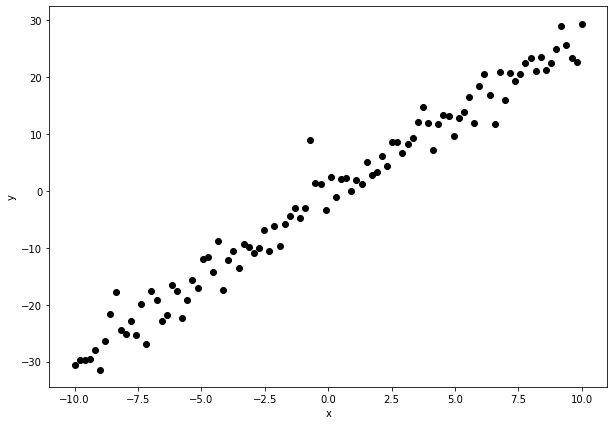

In [43]:
plt.figure(figsize=(10,7))
plt.scatter(x, y, marker='o', color='k')
plt.xlabel('x')
plt.ylabel('y')

<a name="22"></a>
### Modelo do Perceptron

Aqui vamos abusar da nomenclatura e batizar nosso neurônio de "perceptron", mesmo que não seja aplicada a regra de decisão sobre o valor final da combinação linear. Na prática, é apenas uma regressão linear simples.

Primeiro, importantos o módulo ``nn`` da biblioteca ``torch``.

In [44]:
from torch import nn

Agora, vamos instanciar uma camada ``Linear`` do módulo ``nn``.  
Os parâmetros de entrada são ``in_features`` (quantas variáveis são usadas pra estimar a saída) e ``out_features`` (quantas variáveis estamos estimando na saída). No nosso caso, ambos serão $1$.  

Perceba que inicializarei a semente do gerador de números aleatórios.  
Isso foi feito pra que sempre possamos reproduzir esse experimento da mesma maneira.  
Os valores de $w_1$ (``weight``) e $b$ (``bias``) da nossa camada Linear serão inicializados aleatoriamente, usando essa semente.  


In [45]:
torch.manual_seed(59)

perceptron = nn.Linear(in_features=1, out_features=1) # uma entrada (vetor da feature x), uma saída (regressão linear de x com vetor de pesos w e bias b)
print(perceptron.weight)
print(perceptron.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)




Note que na célula anterior acessamos ``weight`` e ``bias`` como atributos da camada Linear. A sáida são tensores, com um parâmetro ``require_grad=True``. Esse parâmetro indica que os tensores estão sujeitos a um processo de atualização, vinculado a um grafo de operações (veremos mais detalhes depois).  

Se estivermos apenas interessados nos valores atuais desses tensores, precisamos acrescentar o atributo ``data`` para extrair uma cópia dos valores atuais dos tensores.

In [46]:
a0 = perceptron.weight.data # recuperando apenas o valor dos parâmetros
b0 = perceptron.bias.data   # data é necessário para acessar apenas os valores do tensor
a0, b0

(tensor([[0.1060]]), tensor([0.9638]))

Vamos testar o quanto as estimativas do nosso neurônio, cujos parâmetros foram inicializados aleatoriamente, estão próximas dos valores reais de $y$. As linhas verticais tracejadas, em vermelho, representam o tamanho (altura) do erro em cada ponto.

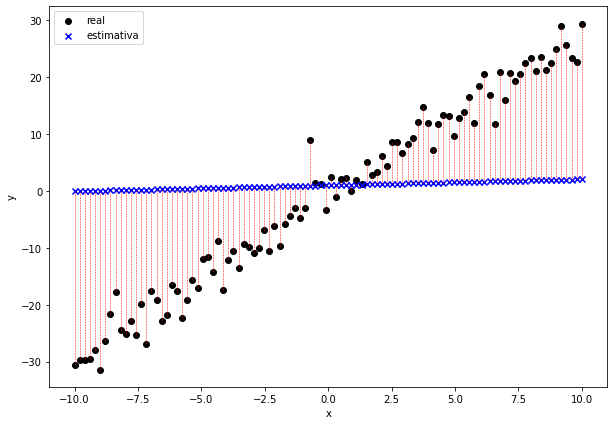

In [47]:
y0 = a0*x + b0               # usando os parâmetros iniciais para fazer uma estimativa de y a partir de x (regressão linear)

plt.figure(figsize=(10,7))
plt.scatter(x,  y, marker='o', color='k', label='real')
plt.scatter(x, y0, marker='x', color='b', label='estimativa')

for xi, yi, y0i in zip(x,y,y0):
  plt.vlines(xi, ymin=min(yi,y0i), ymax = max(yi,y0i), color='red', ls='--', lw=.5)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

set_fontsizes_in_plot()
plt.show()

Claramente, os valores aleatórios da inicialização não correspondem à inclinação e _bias_ da reta original. Para ajustar, em vez de usar as equações fechada da regressão linear, a partir das formulações estatísticas, vamos utilizar um algoritmo iterativo de otimização.  

Através das ferramentas do PyTorch, vamos resolver esse exemplo simples de forma a criar um "fluxo de trabalho" (_workflow_) que pode ser estendido para problemas mais complexos.

<a name="23"></a>
### Modelo de Rede Neural: Herdando da Classe Existente

Antes de mais nada, precisamos criar um **modelo** de previsão usando **classes** derivadas dos módulos internos do PyTorch.  

Isso é importante porque o nosso modelo vai herdar diversos métodos e atributos do Módulo original.  

Dessa forma, não precisaremos implementar todos os detalhes do _workflow_ de otimização dos parâmetros internos do modelo, aproveitando os métodos já desenvolvidos e abstraídos pelo framework independente da complexidade do nosso modelo.

In [48]:
class perceptron_model(nn.Module):
  ''' perceptron_model é o nome escolhido modelo

      torch.nn.Module é a classe "mãe" da qual nosso modelo vai herdar alguns métodos 
  '''
  
  def __init__(self, n_in, n_out): # aqui estamos sobrescrevendo o método construtor da "classe mãe"
    super().__init__() # mas antes vamos rodar o construtor original
    # agora começam as personalizações do construtor:
    self.perceptron = nn.Linear(in_features=n_in, out_features=n_out) # criamos uma camada com nome "perceptron", que recebe um modelo "Linear" (aka regressão linear ou camada "densa")

  def forward(self, x): # aqui vamos sobrescrever como o modelo processa um sinal de entrada x
    x = self.perceptron(x)  # aplicamos o perceptron em x
    return x

Veja que na nossa classe, onde definimos nosso ``perceptron_model``, existe apenas uma camada Linear. Porém, agora essa camada e seus parâmetros internos fazem parte de um objeto que poderia possuir uma série de outras camadas e parâmetros.  

Vamos então instanciar nosso modelo e acessar seus parâmetros.

In [49]:
torch.manual_seed(59)

my_model = perceptron_model(n_in=1, n_out=1)

print(my_model)                         # imprime a arquitetura do modelo construído
print(my_model.perceptron.weight.data) # acessando os pesos da camada nomeada "perceptron"
print(my_model.perceptron.bias.data)   # acessando o bias da camada nomeada "perceptron"

perceptron_model(
  (perceptron): Linear(in_features=1, out_features=1, bias=True)
)
tensor([[0.1060]])
tensor([0.9638])


Outra forma de acessar todos os parâmetros do nosso modelo é invocando o método ``named_parameters()``.  
Esse método foi herdado pela "classe-mãe" ``nn.Module``.

In [50]:
for name, param in my_model.named_parameters(): # outra forma de acessar todos os parâmetros do modelo
    print(name, '\t', param.data)

perceptron.weight 	 tensor([[0.1060]])
perceptron.bias 	 tensor([0.9638])


Existem várias formas de criar modelos mais complexos e nomear as camadas. Veja mais [neste exemplo](https://pytorch.org/docs/master/generated/torch.nn.Sequential.html#torch.nn.Sequential).

<a name="24"></a>
### Aplicando o modelo sobre as entradas

O modelo atua como uma função das entradas que retorna a saída.  
Podemos usar a estrutura: 
```Python 
saida = Modelo(entradas)
```
sempre que quisermos aplicar o nosso modelo para estimar a saída com os parâmetros atuais.

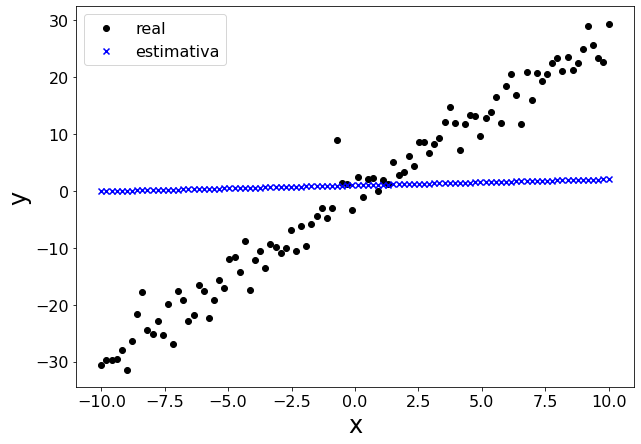

In [51]:
y0 = my_model(x) # o modelo vai usar o método "forward" sobre x, e gerar a saída; cada linha corresponde a um exemplo, portanto X precisa ser uma coluna nesse caso
y0 = y0.data                # acessado os valores do tensor

plt.figure(figsize=(10,7))
plt.scatter(x,  y, marker='o', color='k', label='real')
plt.scatter(x, y0, marker='x', color='b', label='estimativa')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Percebemos claramente que o modelo ainda não está treinado, já que foi novamente inicializado com parâmetros aleatórios.

<a name="25"></a>
### Escolhendo o Critério de Avaliação do Treino (Função Custo)

Para otimizar os parâmetros de um modelo, precisamos de uma métrica de avaliação, a fim de compreender se o modelo está melhorando ou piorando o seu desempenho.

Em problemas de regressão linear, o **erro médio-quadrático** (MSE) é uma métrica comum. O MSE é calculado como a média, sobre todos os exemplos disponíveis, da norma quadrática do vetor de erro.  

De maneira intuitiva, o MSE cálcula o erro $e_i = \hat{y}_i - y_i$ (diferença entre o valor estimado e o valor real) para todos os exemplos $i=1,\ldots, m$, e então calcula a média aritmética do quadrado do módulo dos erros: $\text{MSE} = \dfrac{\sum\limits_{i=1}^{m} \left| e_i \right|^2}{m} $.

No PyTorch, normalmente nos referimos à métrica de desempenho do treinamento como o **critério**.  
Em geral, essa métrica é também conhecida como **função custo** ou **função perda**.

In [52]:
criterion = nn.MSELoss() # erro quadrático médio:  avg( |y-y0|^2 ) sobre todos os exemplos

<a name="26"></a>
### Escolhendo o otimizador dos parâmetros da rede

Para compreender como o modelo irá atualizar seus parâmetros (neste caso, $w_1$ e $b$) a fim de **minimizar a função custo** (neste exemplo, o MSE), precisamos entender o algoritmo do gradiente descendente.

> **A Pizza Heterogênea**
> 
> A palavra **gradiente** está relacionada à  "_variação em alguma direção_".  
> Por exemplo, no mapa de calor da temperatura de um forno, existe uma variação das mais altas temperaturas (próximas da resistência ou das paredes que são fontes de calor) até os pontos mais distantes dessas fontes. 
>
> <img src="https://drive.google.com/uc?export=view&id=15bV2feWgy-qDVA2zaZW0I0jXkQxRXUd-" alt="Heatmap of a pizza" width="300px"/> 
>
> Observe que fora do forno, as cores mais próximas do azul indicam baixas temperaturas, enquanto as cores mais próximas do vermelho dentro do forno indicam as altas temperaturas. Note também que, embora o forno esteja com a temperatura interna distribuida de maneira praticamente uniforme, a pizza não tem a mesma temperatura em todos os pontos.
>
> Se quisermos descobrir qual ponto da piza está mais frio (sem ver o mapa de calor), poderíamos começar tocando em um ponto da pizza (sentindo a temperatura em um ponto inicial) e deslocar nosso dedo na *direção em que a temperatura diminui*.  
> 
> Quando atingirmos um ponto em que, ao deslocar o nosso dedo em qualquer direção, a temperatura só aumenta, teremos encontrado um **mínimo local** da temperatura da pizza. Com sorte, esse ponto será o **mínimo global** (a menor temperatura de toda a pizza). A fim de garantir isso, é bom que tenhamos explorado bem sentindo (medindo) a temperatura em várias regiões dessa pizza.

Matematicamente, escrevemos a atualização dos pesos do nosso modelo da seguinte maneira: seja $\Theta = \begin{bmatrix} w_1 & b \end{bmatrix}^T$ um vetor de parâmetros do nosso modelo, vamos atualizar o vetor $\Theta$ da seguinte maneira:

$\Theta^{t+1} = \Theta^t - \alpha \times \nabla J(\Theta^t)$,

onde $ J(\Theta^t)$ é a função custo, $ \nabla $ é o símbolo do operador "gradiente" (calcula a variação da função custo em relação à variação de $\Theta^t$) e $\alpha>0$ é uma constante denominada __*learning rate*__.

A intuição da expressão anterior é a seguinte: os parâmetros do modelo na próxima iteração ($t+1$) serão iguais aos valores atuais acrescidos de uma proporção **na direção oposta do gradiente da função custo**. 

>**O gradiente descendente e a analogia da montanha**
>
> O gradiente funciona da seguinte maneira: é um calculo da "inclinação" da função custo após uma variação dos parâmetros.  
>
> Imagine que estamos vendados, no meio de uma montanha irregular, tentando descer a montanha. Se dermos alguns passos à frente (aumentamos os valores dos parâmetros, por exemplo) e "sentirmos" que houve uma inclinação de subida da montanha (o custo aumentou), vamos ter que dar alguns passos para trás, na direção oposta (diminuir os nossos parâmetros).
>
> Entretanto, imagine agora que demos dois passos para o lado e "sentimos" que a inclinação da montanha foi de descida (estamos na direção certa, nosso "custo" diminuiu!). Logo, precisamos seguir avançando (dando mais passos) nessa direção!
>
> Na prática, quem controla o quanto vamos mudar os valores dos parâmetros na direção oposta do gradiente é valor de $\alpha$.  
>
> Se $\alpha$ for muito pequeno, vamos dar passos muito pequenos tentando descer essa montanha, e podemos levar muito tempo pra chegar na base! Agora, se $\alpha$ for muito grande, é como se começássemos a correr muito rapidamente na direção oposta do gradiente sem parar pra "sentir" se a inclinação está mudando no caminho percorrido (lembre que estamos vendados, que perigo!).

Na analogia acima, 
- a montanha representa a função custo (o critério), 
- os passos dados em cada iteração são as atualizações (mudanças) no valor dos parâmetros
- e a sensação da inclinação (de subida ou descida) representa o gradiente do custo após uma tentativa de dar passos em alguma direção.

Para calcular a função custo, precisamos avaliá-la após realizar as previsões a partir de todos os exemplos de entrada. Cada iteração $t$ _sobre TODO o conjunto de exemplos de treino_  representa uma **época**. 

**O gradiente descendente altera seus pesos a cada época.**

Na prática, esse processo pode ser muito lento, em razão da escolha de $\alpha$, da natureza da função custo (geografia do terreno da monhtanha) ou da complexidade computacional de realizar previsões para todos os exemplos de entrada (quando houver muitos).

Portanto, existe uma variação do algoritmo chamada "**gradiente descendente estocástico**" (SGD), na qual os exemplos de treino são divididos em uma sequência de **_batches_**, e os parâmetros do modelo são atualizados a cada _batch_, em vez de aguardar uma passagem completa pelo dataset. 

Usar o SGD significa que decidimos calcular o "custo" médio e dar alguns "passos" no ajuste dos parâmetros apenas com amostras do conjunto completo de treino, em vez de analisá-lo por completo antes de tomar alguma decisão. Em geral, isso acelera a convergência do processo de treinamento, mas é preciso escolher muito bem o tamanho e a forma de amostragem das _batches_.

Veja mais animações do gradiente descendente de uma regressão linear [aqui](https://towardsdatascience.com/gradient-descent-animation-1-simple-linear-regression-e49315b24672) e [aqui](https://medium.com/diogo-menezes-borges/what-is-gradient-descent-235a6c8d26b0).

Para utilizar o SGD no PyTorch, vamos usar instanciar um objeto **otimizador**, que carrega o método ``SGD`` da biblioteca ``torch.optim``.  
Note que a _learning rate_ é o principal parâmetro para o construtor desse objeto. 

In [53]:
optimizer = torch.optim.SGD(my_model.parameters(), lr = 0.001) # (stochastic) gradient descent

> **Backpropagation**
> 
> No caso de uma única camada, composta apenas por regressão linear, calcular o gradiente em relação aos parâmetros que processam os dados de entrada é muito fácil. 
> 
> Entretanto, para redes com sequências de camadas, que podem utilizar funções não-lineares como ativação (como a sigmóide), esse cálculo do gradiente não é trivial. 
> 
> Um algoritmo capaz de calcular essas variações do gradiente de maneira automática e por etapas (camada por camada, da saída para a entrada de uma rede neural) foi propost por [Rumelhart, Hinton & Williams em 1986](https://archive.org/details/paralleldistribu00rume).
>
> Basicamente, é uma forma iterativa e estruturada de calcular o gradiente da função custo em relação à variação dos parâmetros da última camada, e acumular esse valor com o efeito da variação dos parâmetros da última camada em relação à variação dos parâmetros da penúltima camada, e assim por diante até chegar nos parâmetros da primeira camada da rede.

<a name="27"></a>
### Treinando o modelo

Vamos estruturar uma laço em que iremos apresentar os dados de entrada para o Modelo durante várias iterações (épocas), realizando o _workflow_ de treinamento de redes neurais no PyTorch.

Épocas (``epochs``): quantidade de vezes que o dataset de treino (inteiro, todos os exemplos) será mostrado para o modelo.

Antes disso, a função abaixo será apenas auxiliar para que consigamos visualizar o treino.

In [54]:
def atualiza_resultado_grafico(ax, x, y_pred, y_true, alpha=1, dt=0.5):
  
  ax.scatter(x, y_pred, marker='x', color='b', label='estimativa', alpha=alpha)
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  
  display.display(pl.gcf())
  display.clear_output(wait=True)
  
  sleep(dt)

def atualiza_parametros_grafico(ax, w, iter, alpha=1, dt=0.5, epochs=100):
  ax.scatter(iter, w, marker='x', color='k', label='weight', alpha=alpha)
  ax.set_xlabel('epochs')
  ax.set_ylabel('w')
  ax.set_xlim([0, epochs])
  ax.set_ylim([-1, 4])
  ax.grid(True)
  display.display(pl.gcf())
  display.clear_output(wait=True)
  
  sleep(dt)

Abaixo segue a estrutura do treinamento em si.  
Ao rodar a célula abaixo, o dataset de treino $x$ (todos os exemplos de treino) será passado para o modelo por ``epochs`` vezes.  
Em cada iteração, é realizado o procedimento:
- $\hat{y} = \text{Modelo}_{\Theta}(x)$
- backpropagation (calcula os gradientes  $\nabla J(\Theta)$ sobre a função custo)
- calcula o valor dos próximos parâmetros usando a regra de atualização do otimizador.

Neste exemplo, lembre que a função custo $J(\Theta)$ é o MSE e o otimizador é o SGD (com $1$ _batch_, que é o próprio dataset de treino).

# finished training!
 epoch: 49  
 initial loss: 269.63906860, 
 final loss: 10.50349808  
 weight: 2.78292108 
 bias: 0.78345239


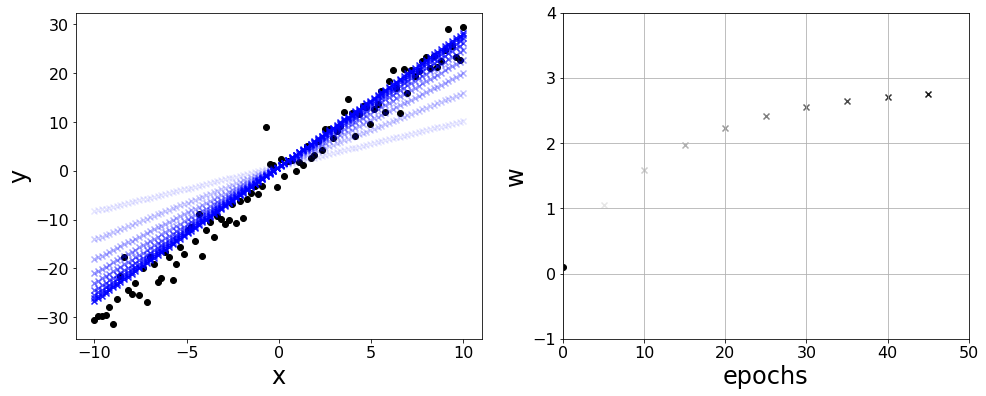

In [55]:
%matplotlib inline

#----------------------- Opcional -----------------------#
# Inicializa a visualização gráfica do treinamento
f, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,6))
ax[0].scatter(x, y, marker='o', color='k', label='real')
ax[1].scatter(0, my_model.perceptron.weight.item(), marker='o', color='k', label='weight')
ax[1].set_ylim([-1, 4])
ax[1].grid(True)
#--------------------------------------------------------#

# PRÂMETROS FIXOS DO TREINO
epochs = 50 
losses = []        # inicialização da lista
print_iters = 5    # auxiliar: para imprimir o status a cada print_iters iterações

# INICIO DO TREINO
for i in range(epochs): # para cada época

    #-----------------------------------#
    # INÍCIO DO WORKFLOW DO TREINAMENTO #
    # 
    y_pred = my_model.forward(x) # apresente os dados de entrada para o modelo, e obtenha a previsão
    
    loss = criterion(y_pred, y)             # calcule a perda (o custo, o erro) 
    optimizer.zero_grad()                   # inicialize os gradientes
    loss.backward()                         # backpropagation sobre a perda atual (cálculo dos novos gradientes) 
    optimizer.step()                        # atualização dos parâmetros da rede utilizando a regra do otimizador escolhido

    losses.append(loss)                     # salvando a perda atual
    
    # FIM DO WORKFLOW DO TREINAMENTO    #
    #-----------------------------------#


    # ------ Bloco Opcional ------ #
    # Imprimindo resultados parciais
    if i % print_iters ==0: # a cada 10 iterações

      # impressão em modo texto
      print(f'epoch: {i:2}  loss: {loss.item():10.8f}  \
      weight: {my_model.perceptron.weight.item():10.8f} \
      bias: {my_model.perceptron.bias.item():10.8f}') 
      
      # visualização gráfica
      alpha_i = 1-(epochs-i)/epochs # calcula uma transparência (0 a 1, sendo 0 totalmente transparente) que vai diminuindo de intensidade ao passar das épocas (até 1, sem transparência)
      atualiza_resultado_grafico(ax=ax[0], x=x, y_pred=y_pred.data, y_true=y, alpha=alpha_i, dt=1) # usar dt (segundos) para causar um atraso para poder acompanhar as atualizações do gráfico
      atualiza_parametros_grafico(ax[1], my_model.perceptron.weight.item(), i, alpha=alpha_i, dt=0.5, epochs=epochs)  
    # ----------------------------- #
#------------------------------------------------------------------------------#

print('# finished training!')
print(f' epoch: {i}  \n initial loss: {losses[0]:10.8f}, \n final loss: {losses[-1]:10.8f}  \n \
weight: {my_model.perceptron.weight.item():10.8f} \n \
bias: {my_model.perceptron.bias.item():10.8f}') 

<a name="28"></a>
### Avaliando o resultado do treino

Uma forma de avaliar o resultado do treinamento é visualizar a evolução da função custo (perda) ao longo das épocas.  

Idealmente, essa curva deve ser decrescente e convergir para um valor mínimo.

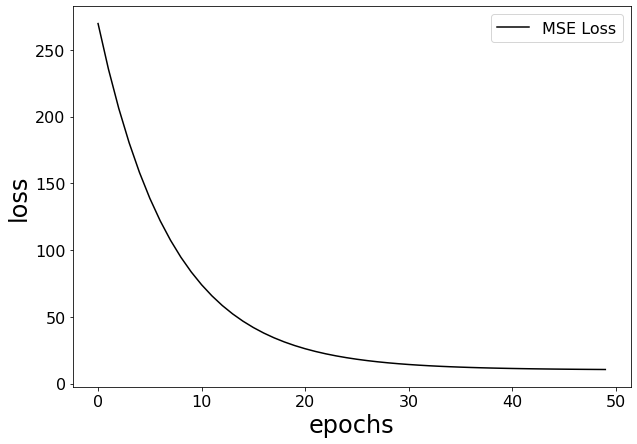

In [56]:
plt.figure(figsize=(10,7))
plt.plot(range(epochs),  losses, '-k', label='MSE Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

Para invocar o modelo treinado e fazer novas previsões, não precisamos mais salvar os cálculos de gradiente dos tensores.  
Portanto, o modelo será executado mais eficientemente usando o gerenciador de contexto com ``torch.nograd()``.

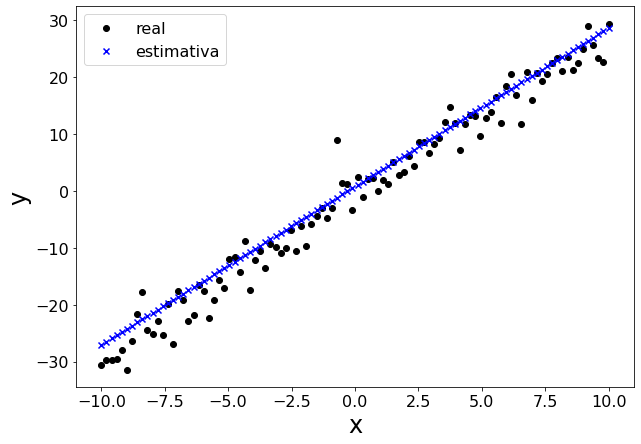

In [57]:
with torch.no_grad(): # usar para reduzir consumo de memória quando executar o modelo já treinado, já que não será aplicado nenhum gradiente após o treinamento
  y0 = my_model(x)    # estimativa da saída com o modelo treinado

plt.figure(figsize=(10,7))
plt.scatter(x,  y, marker='o', color='k', label='real')
plt.scatter(x, y0.data, marker='x', color='b', label='estimativa')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

A fim de ilustração, vamos calcular a função perda manualmente, usando operações com tensores.

In [58]:
MSE_manual = (torch.norm(y0 - y, p=2)**2)/y.numel()
print(MSE_manual)

tensor(10.4576)


Note que o valor é um pouco menor que a última perda salva no workflow de treinamento.

In [59]:
losses[-1]

tensor(10.5035, grad_fn=<MseLossBackward>)

Qual a explicação dessa diferença?

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Resposta $\downarrow$</b></font>
</summary>
<p>
<ul>
    <li>Observando o <i>workflow</i> de treino, note que, após cálcular a última perda, o otimizador roda a atualização dos parâmetros mais uma vez. </li>
    <li> Portanto, o último conjunto de parâmetros calculados resulta numa perda levemente menor que a última perda calculada no treinamento. </li>  
</ul>
</p>


<a name="3"></a>
## Implementando uma rede neural para implementar um modelo não-linear

Embora seja um ótimo _baseline_, uma regressão linear simples, em geral, não garante uma boa solução para prroblemas com relações não-lineares entre as entradas $\mathbf{x}$ e a saída $y$.

Na prática, redes neurais são muito úteis para implementar funções não-lineares, devido à versatilidade de projeto da topologia da rede e da adaptação dos parâmetros durante o treinamento.

<a name="31"></a>
### Dataset da função XOR

Nesta seção, vamos tentar ensinar a função **OU-Exclusivo** (conhecida como X-OR ou apenas XOR) para a rede neural.    
A XOR é definida como  
$\begin{aligned} y & =x_1 \oplus x_2  \\ & = x_1 \bar{x_2} + \bar{x_1} x_2 \end{aligned}$  
sendo $x_1$ e $x_2$ dois bits e a operação $\bar{x}$ a negação (inversão) do valor do bit.

Vamos criar um dataset de exemplos pra o treinamento.  
Na prática, só existem $4$ combinações de bits para a saída.  
Porém, novamente, vamos adicionar um ruído para dificultar a aprendizagem.  
Entretanto, dessa vez o ruído vai estar presente nas variáveis de entrada.

In [60]:
s = 0.075    # desvio padrão do ruído dos sinais de entrada

X1 = torch.randint(low=0, high=2, size=(100,1)).float() 
X1 += s*torch.randn_like(X1)
X2 = torch.randint(low=0, high=2, size=(100,1)).float()
X2 += s*torch.randn_like(X2)

Y  = torch.logical_xor(torch.round(X1), torch.round(X2)).float()

Note que a função XOR depende de duas variáveis de entrada: $x_1$ e $x_2$.  
Em aprendizagem de máquina, as entradas de um modelo são tipicamente denominadas __*features*__ do modelo.  
Abaixo, vamos criar um dataset, no qual uma parte do mesmo é a matriz de _features_ e a outra corresponde à saída.  

Observe que as _features_ e a saída são representadas pelas colunas, enquanto cada linha representa um exemplo de treino.

In [61]:
dataset = torch.cat([X1,X2,Y],dim=1).numpy() # concatena horizontalmente os tensores (dim=1) e depois transforma em uma array numpy
pd.DataFrame(data=dataset,columns=['X1','X2','Y'])

,X1,X2,Y
0,0.979992,0.983558,0.0
1,0.934793,0.931160,0.0
2,0.958496,1.022381,0.0
3,1.078308,1.076509,0.0
4,1.028015,1.085798,0.0
...,...,...,...
95,0.032294,0.926221,1.0
96,-0.046463,-0.056484,0.0
97,-0.042588,0.928851,1.0
98,0.077763,-0.044695,0.0


Vamos visualizar o diagrama de dispersão de pontos no plano das features $x_1 \times x_2$.  
Também, vamos colorir os pontos de acordo com as classes de saída $y$ ($0$ ou $1$ para cada exemplo).

Text(0, 0.5, 'x2')

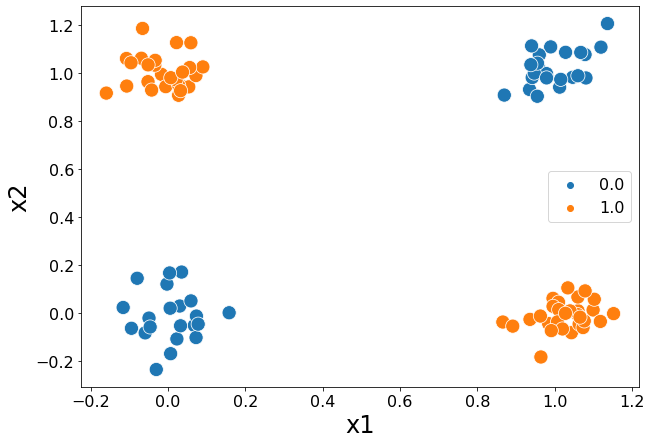

In [62]:
x1_plt = torch.squeeze(X1).numpy()
x2_plt = torch.squeeze(X2).numpy()
y_true_plt = torch.squeeze(Y).numpy()

plt.figure(figsize=(10,7))
sns.scatterplot(x=x1_plt, y=x2_plt, hue=np.round(y_true_plt), s=200)

plt.xlabel('x1')
plt.ylabel('x2')

<a name="32"></a>
### Camada linear com ativação sigmóide: regressão logística

Acrescentaremos uma função de ativação $g(\cdot)$ sobre o resultado da regressão linear calculada pela camada ``Linear``.   

O resultado da rede agora será $y=g\left( \sum\limits_i=1^n w_i x_i \right)$.    

A função de ativação que usaremos é a função sigmóide, que mapeia qualquer número real para um intervalo entre $0$ e $1$.  
A função sigmoide é definida como:
$g\left( h \right) = \dfrac{1}{1+e^{-h}}$.

Abaixo segue a definição do nosso modelo, em formato de classe com herança.  

Diferente do exemplo anterior, precisamos agora especificar a função de ativação sobre os neurônios da camada linear. 

Note que a sequência das camadas não precisa ser definida no método construtor ``__init__``, pois é apenas no método ``forward`` que vamos estabelecer a sequência de operações a ser realizadas.

Entretanto, nesse caso, usamos a camada ``nn.Sequential`` para criar um _pipeline_ único e simplificar a descrição do método foward.  
A camada ``Sequential`` recebe uma lista de camadas, e concatena-as horizontalmente, fazendo com que a sua entrada propague o dado realizando transformações em série (em sequência).

In [63]:
class xor_perceptron(nn.Module):
  
  def __init__(self, n_in, n_out): 
    super().__init__()    

    self.perceptron = nn.Linear(in_features=n_in, out_features=n_out) # criamos uma camada com nome "perceptron", que recebe um modelo "Linear" (aka regressão linear ou camada "densa")
    self.sigmoid = nn.Sigmoid() # a função sigmoide é aplicada sobre os resultados da camada anterior

    layers_list = [self.perceptron, self.sigmoid] # lista das camadas da rede, em ordem sequencial
    self.layers = nn.Sequential(*layers_list)     # "merge" de todas as camamadas em uma layer sequencial

  def forward(self, x): 
    x = self.layers(x)  # aplica a layer sequencial (x vai passando camada por camada, até chegar na saída da rede sequencial)
    return x

Agora, instanciamos o modelo e visualizamos a topologia da rede, bem como os parâmetros inicializados:

In [64]:
my_xor = xor_perceptron(n_in=2, n_out=1)
print(my_xor)

for name, param in my_xor.named_parameters(): # outra forma de acessar todos os parâmetros do modelo
    print(name, '\t', param.data)

xor_perceptron(
  (perceptron): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=1, bias=True)
    (1): Sigmoid()
  )
)
perceptron.weight 	 tensor([[-0.5099, -0.7046]])
perceptron.bias 	 tensor([-0.0098])


<a name="33"></a>
### Função Custo para o problema de Classificação

Para avaliar o problema atual, vamos utilizar a função custo **_binary cross-entropy_** (BCE).  
A BCE é adequada para problemas cuja saída é uma classificação binária.  
Como otimizador, seguiremos usando o SGD.

In [65]:
criterion = nn.BCELoss() # binary cross-entropy
optimizer = torch.optim.SGD(my_xor.parameters(), lr = 0.01) 

<a name="34"></a>
### Treinando a regressão logística

Vamos encapsular o loop de treinamento em uma única função, para não reescrevê-lo mais.

In [66]:
def train_loop(model, data, max_epochs = 1000, print_iters = 5):
  '''Função que organiza o fluxo de treinamento de um modelo do torch.

  Entradas:
    model: um objeto instanciado do modelo para ser treinado
    data: uma tupla (X_treino, Y_treino), com os dados de treinamento supervisionado
      
    max_epochs: total de vezes que 'data' será iterado dando exemplos para o modelo
    print_iters: auxiliar, define a frequência de impressão dos resultados parciais 

    Saídas:

    model: modelo treinado, com parâmetros atualizados
    losses: lista com o os valores das perdas ao longo das épocas
    accs: lista com a taxa de acerto (acurácia) do modelo ao longo das épocas
  '''
  
  X_train, Y_train = data
  losses = []
  accs = []

  for i in range(max_epochs): # para cada época
     
    #-----------------------------------#
    # INÍCIO DO WORKFLOW DO TREINAMENTO #
    # 
    Y_pred = model.forward(X_train) # apresente os dados de entrada para o modelo, e obtenha a previsão
      
    loss = criterion(Y_pred, Y_train)       # calcule a perda (o custo, o erro) 
    optimizer.zero_grad()                   # inicialize os gradientes
    loss.backward()                         # backpropagation sobre a perda atual (cálculo dos novos gradientes) 
    optimizer.step()                        # atualização dos parâmetros da rede utilizando a regra do otimizador escolhido
    # FIM DO WORKFLOW DO TREINAMENTO    #
    #-----------------------------------#


    # ------ Bloco Opcional ------ #
    # Salvando métricas
    losses.append(loss)                     # salvando a perda atual
    acc = calc_accuracy(Y_pred, Y_train)    # calcula a taxa de acerto atual
    accs.append(acc)

    # Imprimindo resultados parciais
    if i % print_iters ==0: # a cada t iterações
      print(f'epoch: {i:2}  loss: {loss.item():10.8f} accuracy: {acc:2.8f}') 
    #-----------------------------------#

  #----------------------------------------------------------------------------#     
  print('\n# finished training!')
  print(f' # --> epoch: {i}  \n# --> initial loss: {losses[0]:10.8f}, \n# --> accuracy: {acc:2.8f} , \n# --> final loss: {losses[-1]:10.8f}')

  # retorna resultados
  return model, losses, accs


def calc_accuracy(y_pred, y_true):
  ''' Helper function para calcular a taxa de acerto deste exemplo.
  '''
  num_hits  = torch.sum(torch.round(y_pred)==y_true).numpy()
  num_total =  float(y_true.numel())
  acc=  num_hits/num_total
  return acc

Vamos agrupar todas as features para que formem uma matriz de entrada ``X_train``.

In [67]:
X_train = torch.cat([X1, X2], dim=1) # concatena os vetores coluna em uma matriz [X1 X2] com m linhas (exemplos) e n colunas (features)
data = (X_train, Y) # encapsula (X,Y) de treino numa tupla (dupla)

Agora vamos chamar a fução de treinamento, indicando o número de iterações:

In [68]:
my_xor, losses, accs = train_loop(my_xor, data, max_epochs=2000, print_iters=100) # note que o modelo é sobrescrito pela saída treinada

epoch:  0  loss: 0.78253359 accuracy: 0.35000000
epoch: 100  loss: 0.73152548 accuracy: 0.24000000
epoch: 200  loss: 0.70713264 accuracy: 0.27000000
epoch: 300  loss: 0.69590032 accuracy: 0.53000000
epoch: 400  loss: 0.69080216 accuracy: 0.54000000
epoch: 500  loss: 0.68848878 accuracy: 0.69000000
epoch: 600  loss: 0.68742639 accuracy: 0.76000000
epoch: 700  loss: 0.68692470 accuracy: 0.79000000
epoch: 800  loss: 0.68667531 accuracy: 0.79000000
epoch: 900  loss: 0.68654001 accuracy: 0.79000000
epoch: 1000  loss: 0.68645740 accuracy: 0.78000000
epoch: 1100  loss: 0.68639952 accuracy: 0.76000000
epoch: 1200  loss: 0.68635446 accuracy: 0.76000000
epoch: 1300  loss: 0.68631625 accuracy: 0.76000000
epoch: 1400  loss: 0.68628210 accuracy: 0.75000000
epoch: 1500  loss: 0.68625128 accuracy: 0.74000000
epoch: 1600  loss: 0.68622291 accuracy: 0.73000000
epoch: 1700  loss: 0.68619651 accuracy: 0.70000000
epoch: 1800  loss: 0.68617201 accuracy: 0.70000000
epoch: 1900  loss: 0.68614930 accuracy: 0.

Vamos avaliar o resultado plotando:
- o gráfico da evolução da perda BCE vs. as épocas de treinamento,
- o gráfico da taxa de acerto (acurácia) vs. as épocas de  treinamento.

Vamos organizar uma função para facilitar essa visualização.

In [69]:
def plot_loss_and_accuracy(losses, accs):

  fig, ax_tuple = plt.subplots(1, 2, figsize=(16,6))
  fig.suptitle('Loss and accuracy')

  for i, (y_label, y_values) in enumerate(zip(['BCE loss','Accuracy'],[losses, accs])):
    ax_tuple[i].plot(range(len(y_values)),  y_values, label='train')
    ax_tuple[i].set_xlabel('epochs')
    ax_tuple[i].set_ylabel(y_label)
    ax_tuple[i].legend()

 Mostrando os gráficos, percebemos que o exemplo saturou em uma perda relativamente alta.  
 Além disso, a evolução da taxa de acerto apresenta uma curva estranha, e converge para um valor insatisfatório.

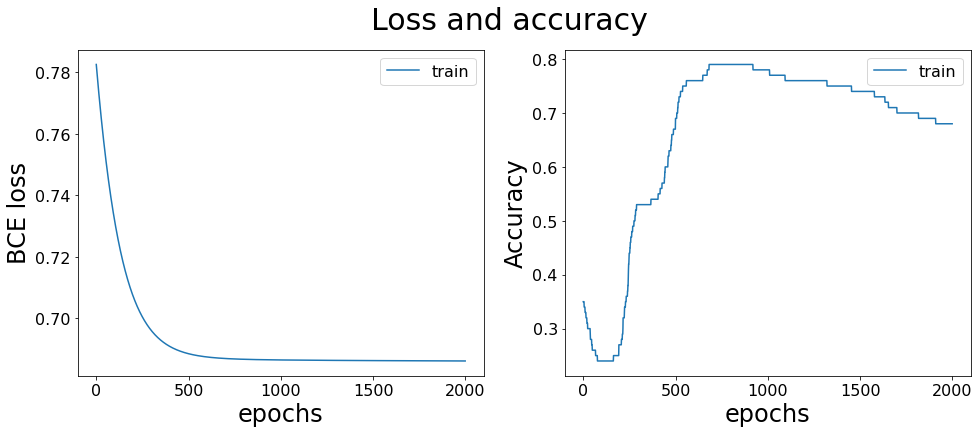

In [70]:
plot_loss_and_accuracy(losses, accs)

Vamos tentar visualizar o scatterplot das saídas previstas no espaço cartesiano $x_1 \times x_2$ (aqui, $\times$ indica produto cartesiano). 

Primeiro, vamos gerar as previsões com o modelo treinado.

In [71]:
with torch.no_grad():
  y_pred_plt = torch.squeeze(my_xor(torch.cat([X1, X2],dim=1))).numpy() # para transformar em numpy, é necessário primeiro desvincular o ten

Fazendo a imagem das saídas, notamos que a rede não aprendeu a função XOR.    

Note também que precisamos arrendodar o valor de saída da sigmoid para estratificar em $\hat{y}=\left\lbrace 0,1 \right\rbrace$.

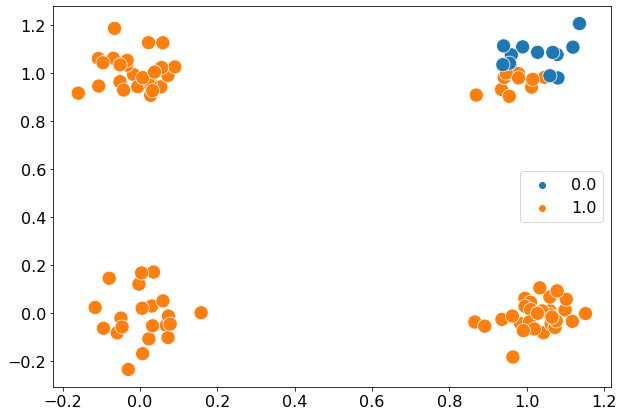

In [72]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=x1_plt, y=x2_plt, s=200, hue=np.round(y_pred_plt))

<a name="35"></a>
### Feature Engineering: incluindo não-linearidades na entrada

A regressão logística não foi capaz de aprender a função XOR adequadamente.   

Uma possível alternativa seria buscarmos um modelo mais complexo, com mais camadas e neurônios.

Entretanto, podemos tentar manter a simplicidade do modelo e inserir as não-linearidades na entrada, acrescentando novas _features_.  
Esse processo é chamado *__feature engineering__*.

Já temos as features $x_1$ e $x_2$, os bits de entrada da função XOR.  
Vamos criar uma feature que combina as duas entradas usando $x_1 x_2$.  
Note que, embora a operação dos tensores seja com valores ``float``, o resultado, caso não houvesse ruído, seria idêntico ao da operação booleana ``and`` $x_1 \& x_2$.

In [73]:
dataset = torch.cat([X1,X2, X1*X2,Y],dim=1).numpy() # feature engineering
pd.DataFrame(data=dataset,columns=['X1','X2', 'X1*X2','Y'])

,X1,X2,X1*X2,Y
0,0.979992,0.983558,0.963880,0.0
1,0.934793,0.931160,0.870442,0.0
2,0.958496,1.022381,0.979949,0.0
3,1.078308,1.076509,1.160808,0.0
4,1.028015,1.085798,1.116217,0.0
...,...,...,...,...
95,0.032294,0.926221,0.029911,1.0
96,-0.046463,-0.056484,0.002624,0.0
97,-0.042588,0.928851,-0.039558,1.0
98,0.077763,-0.044695,-0.003476,0.0


Vamos repetir todo procedimento anterior:
- instanciar um modelo, agora com $n_{\text{in}}=3$ features de entrada
- escolher o critério do treino (a função perda), novamente a BCE
- escolher o otimizador (SGD) e a _learning rate_
- treinar o modelo
- fazer as previsões com o modelo treinado.

Vamos aproveitar as funções anteriores para simplificar tudo numa única célula.

In [74]:
my_xor = xor_perceptron(n_in=3, n_out=1)
criterion = nn.BCELoss() # binary cross-entropy
optimizer = torch.optim.SGD(my_xor.parameters(), lr = 0.05) 
data = (torch.cat([X1, X2, X1*X2], dim=1), Y)
my_xor, losses, accs = train_loop(my_xor, data, max_epochs=2000, print_iters=100)

with torch.no_grad():
  y_pred_plt = torch.squeeze(my_xor(torch.cat([X1, X2, X1*X2],dim=1))).numpy() # para transformar em numpy, é necessário primeiro desvincular o ten

epoch:  0  loss: 0.80011767 accuracy: 0.55000000
epoch: 100  loss: 0.64209604 accuracy: 0.66000000
epoch: 200  loss: 0.57851976 accuracy: 0.79000000
epoch: 300  loss: 0.53213811 accuracy: 0.79000000
epoch: 400  loss: 0.49533677 accuracy: 0.79000000
epoch: 500  loss: 0.46456447 accuracy: 0.79000000
epoch: 600  loss: 0.43788895 accuracy: 0.79000000
epoch: 700  loss: 0.41421303 accuracy: 0.80000000
epoch: 800  loss: 0.39287907 accuracy: 0.83000000
epoch: 900  loss: 0.37346742 accuracy: 0.87000000
epoch: 1000  loss: 0.35569093 accuracy: 0.89000000
epoch: 1100  loss: 0.33933944 accuracy: 0.93000000
epoch: 1200  loss: 0.32424951 accuracy: 0.96000000
epoch: 1300  loss: 0.31028771 accuracy: 0.97000000
epoch: 1400  loss: 0.29734203 accuracy: 0.99000000
epoch: 1500  loss: 0.28531513 accuracy: 1.00000000
epoch: 1600  loss: 0.27412194 accuracy: 1.00000000
epoch: 1700  loss: 0.26368687 accuracy: 1.00000000
epoch: 1800  loss: 0.25394279 accuracy: 1.00000000
epoch: 1900  loss: 0.24482954 accuracy: 1.

Agora visualizamos a perda e a acurácia e notamos que o modelo conseguiu generalizar a função XOR a partir dos exemplos $(X, Y)$.  

Porém, lembre que aumentamos o espaço de featuers de $X$, usando  
$(x_1, x_2, x_1 x_2)\to y$  
em vez de apenas  
$(x_1, x_2) \to y$.

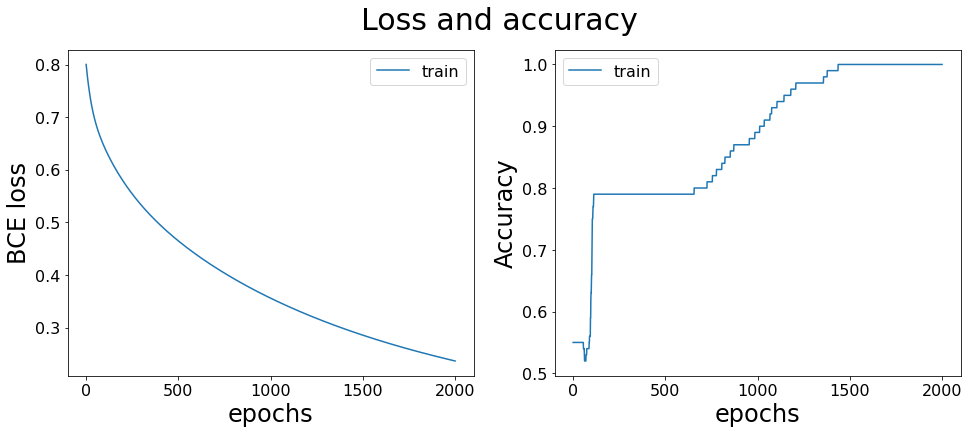

In [75]:
plot_loss_and_accuracy(losses, accs)

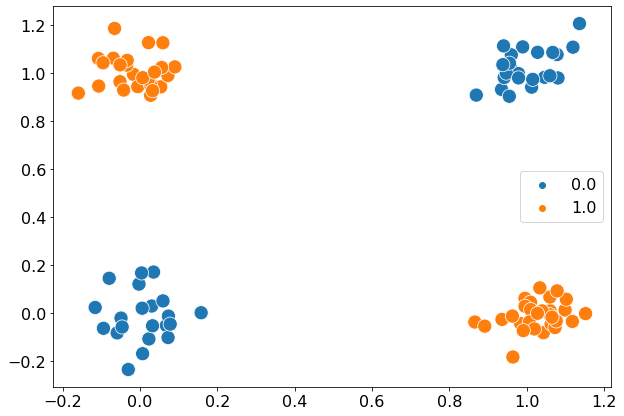

In [76]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=x1_plt, y=x2_plt, s=200, hue=np.round(y_pred_plt))

<a name="4"></a>
## Redes com mais camadas

Estudar exemplo da ["rede classificadora de elipses"](https://github.com/fontanads/machine_learning/blob/master/pytorch_labs/PyTorch_Custom_BCE_Loss_and_GradOpt.ipynb):
- modelos com várias camadas densas
- função de ativação ReLU.

<a name="5"></a>
## Procesamento de Linguagem Natural e Embedding Layers

Camadas densas com uma função de ativação apropriada são capazes de generalizar muitas funções, inclusive funções não-lineares.  

Porém, essas camadas assumem que os dados de entrada são quantiativos, ou seja, um vetor de valores reais.

<a name="51"></a>
### Variáveis Categóricas

Quando nossos dados são **categóricos** por natureza, ou seja, são classes que não possuem relação de ordem entre si, as camadas densas não são a melhor forma de fazer o processamento.

Considere um vetor de dados categóricos $\mathbf{x}$, em que cada elemento $x_i$ do vetor pode assumir apenas um valor do conjunto $\mathcal{X}=\left\lbrace 0, 1, \ldots, N-1 \right\rbrace$.  

Ou seja, cada entrada do vetor $\mathbf{x}$ representa uma dentre $N$ classes possíveis.  

Nesse tipo de dado, não existe o conceito de comparação $x_2 > x_1$, ou coisas do gênero, pois **os números que representam as classes são apenas símbolos para enumerar as diferentes categorias existentes**.

<a name="52"></a>
### One-Hot Encoding

Como existem $N$ classes, uma representação matemática possível é transformar cada classe em um **vetor esparso**, com $N$ elementos, onde o único valor não-nulo de cada vetor seja um número $1$ na posição correspondente da classe que será representada. Essa representação esparsa se chama _one-hot encoding_.

Vamos considerar um exemplo concreto. Suponha que temos $N=3$ classes, ou seja, $\mathcal{X}=\left\lbrace 0, 1, 2 \right\rbrace$. A transformação _one-hot encoding_ vai criar as seguintes representações vetoriais para cada classe:
- classe $0$ será mapeada para o vetor $\mathbf{x}_0 = \begin{bmatrix} 1 & 0 & 0 \end{bmatrix}$
- classe $1$ será mapeada para o vetor $\mathbf{x}_1 = \begin{bmatrix} 0 & 1 & 0 \end{bmatrix}$
- classe $2$ será mapeada para o vetor $\mathbf{x}_2 = \begin{bmatrix} 0 & 0 & 1 \end{bmatrix}$.

> **Desvantagens da representação _one-hot encoding_**
> 
> Um dos problemas da represnetação _one-hot encoding_ é que, num cenário onde o número de categorias seja muito grande (exemplo: do tamanho de um vocabulário de palavras de um idioma), teremos vetores dimensões muito grandes (cada vetor tem tamanho igual ao número de classes), com apenas um valor não-nulo cada.  
> 
> Além de tornar os vetores muito grandes, o processo obriga que a computação seja feita com álgebra para matrizes e vetores esparsos, a fim de tornar o processo computacionalmente eficiente e viável.
> 
> Outro problema é que a representação esparsa _one-hot encoding_ é invariante, não possui nenhum parâmetro adatável, e não absorve nenhum tipo de relação de "distância" (ou diferenciação) entre dois vetores que representam diferentes classes (é como se todas as classes estivessem equidistances uma das outras).

<a name="53"></a>
### Embedding Layer

Como alternativa à representação esparsa de variáveis categóricas, podemos usar uma **representação vetorial densa**.  
Nessa abordagem, cada classe do conjunto $\mathcal{X}$ possuirá uma representação geométrica no espaço euclidiano $\mathbb{R}^n$, onde $n$ é um número arbitrário de dimensões, escolhido em função da complexidade do problema.  
Essas representações densas são denominadas _embeddings_. A palavra remete ao fato de que os vetores "embarcam" características de cada classe, criando inclusive uma relação de distâncias e agrupamentos entre classes no espaço euclidiano.

Imagine o exemplo anterior, $N=3$  classes, ou seja,  $\mathcal{X}={0,1,2}$.  
Vamos escolher $n=2$ dimensões (plano cartesiano) para construir o _embedding_ dessas classes.
Inicializando com valores aleatórios, poderíamos ter as seguintes representações:
- classe $0$ será mapeada para o vetor $\mathbf{x}_0 = \begin{bmatrix} 2.1 & 3.2 \end{bmatrix}$
- classe $1$ será mapeada para o vetor $\mathbf{x}_1 = \begin{bmatrix} 1.9 & -1.1 \end{bmatrix}$
- classe $2$ será mapeada para o vetor $\mathbf{x}_2 = \begin{bmatrix} -3.1 & -1.2 \end{bmatrix}$.

Embedding Matrix: 
 [[ 2.1  3.2]
 [ 1.9 -1.1]
 [-3.1 -1.2]]


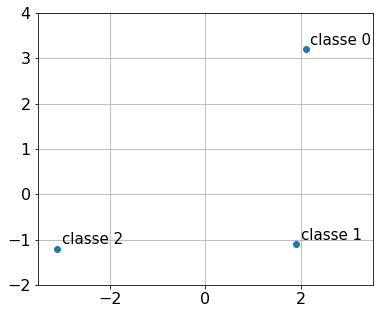

In [77]:
embedding_example = np.array([[2.1, 3.2], [1.9, -1.1], [-3.1, -1.2]]) # matriz de embedding
print(f'Embedding Matrix: \n {np.array_str(embedding_example)}')      

plt.figure(figsize=(6,5))
plt.scatter(x=embedding_example[:,0], y=embedding_example[:, 1])      # cada linha é uma classe, cada coluna é uma dimensão do embedding
plt.grid()
for x, coord in zip (range(3), embedding_example):
  plt.annotate(s='classe '+ str(x),xy=coord+.1, fontsize=15)

plt.xlim([-3.5,3.5])
plt.ylim([-2,4]);

Note que, ao agrupar todos os _embeddings_ numa matriz  
$\mathbf{E}$ de tamanho $N \times n$,  
ou seja, 
- cada linha correspondendo ao _embedding_ de uma classe e 
- cada coluna correspondendo a uma dimensão diferente do embedding

podemos dizer que o vetor _one-hot ecoded_ $\mathbf{x}_{i}$, de tamanho  $1\times N$, que representa a classe $i$ (possui $1$ na $i$-ésima coluna e zero nas demais) **seleciona a linha** (o _embedding_) $\mathbf{e}_i$ da matriz $\mathbf{E}$ através da multiplicação:
$\mathbf{e_i} = \mathbf{x}_i \mathbf{E}$.

Essa notação serve apenas para uma descrição matemática da operação.  
Na prática, em código, para ser eficiente, basta selecionar com um slice da matriz ```e_i = E[i]```.


<a name="54"></a>
### Embedding Layers no PyTorch

Para criar um embedding no PyTorch, inicializado com valores aleatórios, usamos a camada ```nn.Embedding```:

Embedding(3, 2)
o embedding da classe 0 é tensor([ 0.3961, -1.7381])
o embedding da classe 1 é tensor([2.7990, 1.2095])
o embedding da classe 2 é tensor([-0.7230,  0.0201])


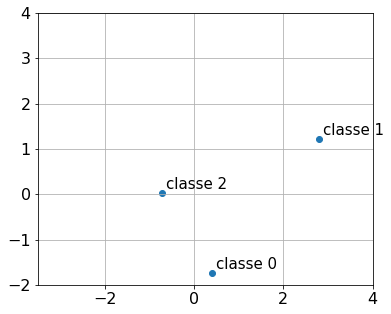

In [78]:
embedding_layer = nn.Embedding(num_embeddings=3, embedding_dim=2)
print(embedding_layer)
for i in torch.arange(0,3,1):
  print(f"o embedding da classe {i} é {embedding_layer(i).data}")

embedding_matrix = embedding_layer(torch.arange(0,3,1)).data

plt.figure(figsize=(6,5))
plt.scatter(x=embedding_matrix[:,0], y=embedding_matrix[:, 1])      # cada linha é uma classe, cada coluna é uma dimensão do embedding
plt.grid()
for x, coord in zip (range(3), embedding_matrix):
  plt.annotate(s='classe '+ str(x),xy=coord+.1, fontsize=15)

plt.xlim([-3.5,4.0])
plt.ylim([-2,4]);

Note que

In [79]:
embedding_layer(torch.arange(0,3,1))

tensor([[ 0.3961, -1.7381],
        [ 2.7990,  1.2095],
        [-0.7230,  0.0201]], grad_fn=<EmbeddingBackward>)

é uma matriz de _embedding_ que está sendo representada por um tensor, e que esse tensor possui um método de gradiente associado.  
Ou seja, **é possível treinar os parâmetros do Embedding para otimizar a tarefa que a rede neural está realizando**, buscando encontrar a melhor representação possível da variável categória.

> **Como avaliar se um _Embedding_ é uma boa representação da minha variável categórica?**
> 
> Em aplicações de **processamento de linguagem natural (NLP)**, cada palavra do vocabulário pode ser representada por um word-embedding, tipicamente na ordem de $50$ a $300$ dimensões.  
> 
> Esses word-embeddings são obtidos treinando os parâmetros de uma rede neural (os valores dos elementos da matriz da camada de _embedding_) com um vocabulário grande e um _corpus_ muito extenso. 
> 
> Em geral, é difícil avaliar se um word-embedding é uma boa representação do vocabulário sem definir uma tarefa a mais para a rede-neural.
> 
> Em NLP, dois _embeddings_ consolidadados da língua inglesa são [GLoVe](https://nlp.stanford.edu/projects/glove/) e [word2vec](https://code.google.com/archive/p/word2vec/) foram treinados em _corpus_ enormes e obtiveram bons resultados no processo de gerar "**analogias de palavras**". 
> 
> Por exemplo, ao realizar a operação vetorial 
>  ```Embedding['Paris'] - Embedding['France'] + Embedding['Italy']```,
> o vetor resultante é muito próximo (geometricamente) do ponto ```Embedding['Rome']```.  
> Similarmente,  
> ```Embedding['king'] - Embedding['man'] + Embedding['woman']```  
> resulta num ponto muito próximo de  ```Embedding['queen']```.
>
> Para mais informações sobre métodos de avaliação de word-embeddings, [leia este artigo](https://arxiv.org/pdf/1801.09536.pdf).

<a name="55"></a>
### Dataset de NLP: SMS Spam

Vamos montar uma rede neural com PyTorch para implementar um classificador de Spam.  
Trataremos o problema com uma aplicação de NLP.  

Abaixo, carregamos o dataset utilizado do arquivo ```spam.csv```, obtido do [repositório de Machine Learning da UCI](https://archive.ics.uci.edu/ml/datasets/spambase).

In [80]:
encoding_str = 'Windows-1252' # 'iso-8859-1'
url_data = 'https://raw.githubusercontent.com/fontanads/machine_learning/master/pytorch_labs/data/spam.csv'
data = pd.read_csv(url_data, encoding=encoding_str, usecols=['v1','v2'])
data = data.rename(columns={'v1':'label','v2':'e-mails'})
data['y'] = data['label'].replace({'ham':0,'spam':1})
data = data[['e-mails', 'label','y']]

Observe o dataset original traz "sentenças" e "rótulos, sendo os rótulos possíveis "ham" ou "spam".  
A coluna $y$ foi adicionada manualmente na célula anterior, substituindo "ham" por "0" (não é spam) e "spam" por $1$ (é spam).

In [81]:
data.head()

,e-mails,label,y
0,"Go until jurong point, crazy.. Available only ...",ham,0
1,Ok lar... Joking wif u oni...,ham,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,1
3,U dun say so early hor... U c already then say...,ham,0
4,"Nah I don't think he goes to usf, he lives aro...",ham,0


Número total de exemplos do dataset: $5572$.

In [82]:
len(data)

5572

<a name="56"></a>
### Limpeza do Texto e Criação de um Vocabulário

> _Disclaimer_: em geral, num problema de machine learning, e também em NLP, o primeiro passo é dividir o dataset em treino e teste, e só então realizar os pré-processamentos.  
> 
> Porém, vou ignorar a regra para conseguir um vocabulário maior, pois o _dataset_ é muito pequeno.

Vamos percorrer o dataset e criar um vocabulário, ou seja, um conjunto de palavras $\mathcal{V}=\left\lbrace w_1, \ldots, w_V \right\rbrace$, que terá tamanho $V$.  

Para que não seja muito extenso, vamos fazer uma limpeza e pré-processamento:
- as palavras serão convertidas em minúsculas (``lowercase``)
- _stopwords_ serão removidas
- palavras muito pequenas, que não atinjam um número mínimo de caracteres, serão removidas.

In [83]:
vocab_set = set() # será usado para gerar o vocabulário principal
all_tokens = []   # opcional: usei para aplica o método Counter() e gerar a frequência das palavras, mas é irrelevante para a rede neural
max_len_doc = 0   # vamos medir o maior comprimento das mensagens envidas, em número de tokens
sum_len_doc = 0   # vamos medir o valor médio de palavras (tokens) por mensagem
min_word_len = 3  # comprimento mínimo de um token (em número de caracteres) para entrar no vocabulário 

for doc in data['e-mails']: # para cada documento do dataset
  sentences = nltk.sent_tokenize(doc)  # tokenizar em uma lista de frases com nltk
  tokens = nltk.wordpunct_tokenize(' '.join(sentences)) # tokenizar o documento inteiro em uma lista de palavras também
  # limpeza dos tokens: lowercase, alfabético, não é stopword, tem mais de min_word_len caracteres
  tokens_list = [t.lower() for t in tokens if t.lower().isalpha() and (t.lower() not in stop_words) and len(t)>=min_word_len] 
  # uso da função set: cria um conjunto dos elementos únicos da lista
  tokens_set = set(tokens_list)
  vocab_set = set.union(vocab_set, tokens_set) # adiciona elementos únicos que ainda não pertencem ao conjunto do vocabulário

  sum_len_doc += len(tokens)
  if len(tokens) > max_len_doc:
    max_len_doc=len(tokens)

  all_tokens.extend(tokens_list)

print(f'Tamanho total do vocabulário: V={len(vocab_set)}')
print(f'Número de palavras da mensagem mais longa: {max_len_doc}')
print(f'Média de palavras por mensagem: {sum_len_doc/len(data):3.4f}')

Tamanho total do vocabulário: V=7222
Número de palavras da mensagem mais longa: 210
Média de palavras por mensagem: 19.4939


> O trecho abaixo analisa a frequência das palavras no dataset.  
> Não vamos precisar disso na rede neural, mas vamos usar essa informação para explorar os resultados ao fim do treino e teste.

In [84]:
from collections import Counter                # cria dicionário de frequência de items
count_dictionary = Counter(all_tokens)         # vai fazer a contagem de palavras e converter em um dicionário
print(f'Vocabulário de tamanho V={len(count_dictionary)}')   # conferindo que o tamanho do vocabulário é o mesmo obtido no método anterior
N = 10
print(count_dictionary.most_common(N))             # imprime as N palavras  mais comuns e suas frequências
print(count_dictionary.most_common()[:-N-1:-1])    # imprime as N palavras menos comuns e suas frequências

Vocabulário de tamanho V=7222
[('call', 591), ('get', 391), ('free', 284), ('know', 261), ('like', 245), ('good', 245), ('got', 239), ('day', 229), ('come', 229), ('time', 220)]
[('bitching', 1), ('suggestions', 1), ('pity', 1), ('salesman', 1), ('lowes', 1), ('heap', 1), ('dump', 1), ('nmde', 1), ('dental', 1), ('accent', 1)]


Vamos criar agora duas estruturas Python:
- o **dicionário** ``word2idx`` recebe como chave uma palavra (token) e converte o mesmo para um índice (variável categórica) de correspondência única (mapeamento um pra um)
- a **lista** ``idx2word`` faz a operação contrária, a posição do elemento (seu índice) indica a palavra (token) correspondente.

Vamos adicionar ao vocabulário dois tokens:
- ``'<OOV>'`` para lidar com palavras novas, fora do vocabulário do corpus
- ``'<PAD>'`` para preencher sentenças curtas até um comprimento mínimo.

In [85]:
word2idx = dict({})        # inicializa o dicionário
word2idx['<OOV>'] = 0      # índice da tag "out of vocabulary" é 0
word2idx['<PAD>'] = 1      # índice da tag "padding token" é 1

for i, v in enumerate(sorted(vocab_set),start=2): # enumera o vocabulário em ordem alfabética, a partir do índice 2
  word2idx[v] = i

# testando a conversão "word to index" com o dicionário:
print(f'index for "<PAD>": {word2idx["<PAD>"]}')
print(f'index for "action": {word2idx["action"]}')

index for "<PAD>": 1
index for "action": 60


In [86]:
idx2word = list(word2idx.keys()) # apenas transforma as chaves (palavras ordenadas) do dicionário word2idx em uma lista

# testando a conversão "index to word":
print(f'word for index 0:    {idx2word[0]}')
print(f'word for index 100": {idx2word[100]}')

word for index 0:    <OOV>
word for index 100": aeronautics


<a name="57"></a>
### Codificando as mensagens

Agora que temos o mapeamento do vocabulário para variáveis categóricas (índices), vamos codificar as mensagens.  
Observe que cada mensagem do dataset pode ter uma ou mais frases:

In [87]:
for msg in data['e-mails'].sample(5):
  print(msg)

Tell them the drug dealer's getting impatient
Free any day but i finish at 6 on mon n thurs...
Gud mrng dear hav a nice day
Haha, my friend tyler literally just asked if you could get him a dubsack
Try to do something dear. You read something for exams


Portanto, nossa estratégia será a seguinte:
- vamos converter as mensagens em uma sequência de índices (correspondentes aos tokens das mensagens)
- vamos limitar o cumprimento máximo da mensagem (truncar a mensagem) em ``max_len`` tokens
- vamos acrescentar tokens ``'<PAD>'`` em frases curtas até atingirem ``max_len`` tokens.  
Isso vai nos garantir que todas as mensagens serão mapeadas para um vetor de ``max_len`` elementos, onde cada elemento é uma variável categórica (índice que representa um token do vocabulário).


In [88]:
max_len = 64         # comprimento máximo da mensagem (em número de palavras)
encoded_docs = []    # inicializa a lista de documentos codificados
for doc in data['e-mails']: # para cada mensagem
  # sentences = nltk.sent_tokenize(doc)                              # separa o documento por frases
  # tokens = nltk.wordpunct_tokenize(' '.join(sentences))            # junta as frases e separa o documento por tokens
  tokens = nltk.wordpunct_tokenize(doc)                              # tokeniza o documento
  encoded_d = [word2idx.get(t,word2idx['<OOV>']) for t in tokens]    # codifica o documento usando o dicionário word2idx
  encoded_d += [word2idx['<PAD>']]*max(0, max_len-len(encoded_d))    # adiciona o padding, se necessário
  
  encoded_docs.append(encoded_d[:max_len])                           # trunca o documento e salva na lista de documentos codificados

len(encoded_docs)  

5572

Vamos então adicionar as mensagens codificadas ao dataset original, na coluna denominada ``X``:

In [89]:
data['X'] = encoded_docs
data.head()

,e-mails,label,y,X
0,"Go until jurong point, crazy.. Available only ...",ham,0,"[0, 0, 3258, 4666, 0, 1380, 0, 0, 0, 0, 836, 0..."
1,Ok lar... Joking wif u oni...,ham,0,"[0, 3399, 0, 0, 6982, 0, 4321, 0, 1, 1, 1, 1, ..."
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,1,"[0, 1965, 0, 0, 0, 7032, 1222, 0, 6994, 0, 0, ..."
3,U dun say so early hor... U c already then say...,ham,0,"[0, 1831, 5354, 0, 1849, 2873, 0, 0, 0, 182, 0..."
4,"Nah I don't think he goes to usf, he lives aro...",ham,0,"[0, 0, 0, 0, 0, 6325, 0, 2537, 0, 6708, 0, 0, ..."


In [90]:
# verificando o comprimento de um exemplo de mensagem codificada
msg_codificada_ex = data['X'].iloc[53]
print(f' Mensagem codificada {msg_codificada_ex} \n Comprimento: {len(msg_codificada_ex)}')

 Mensagem codificada [0, 0, 0, 4134, 5011, 0, 0, 0, 0, 1916, 0, 0, 41, 0, 0, 6344, 0, 3497, 0, 0, 5611, 0, 0, 0, 0, 607, 0, 1346, 0, 0, 191, 5418, 0, 2714, 0, 0, 0, 979, 0, 0, 0, 0, 5779, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2516, 0, 0, 0, 0, 5779, 0, 4277, 0, 0] 
 Comprimento: 64


<a name="58"></a>
### Separação de Treino e Teste

Aqui, vamos separar o dataset em treino e teste.  
Lembre que, em problemas reais, esse passo deve ocorre ainda antes do pré-processamento, limpeza e construção do vocabulário!  
Vamos usar apenas as mensagens codificadas (vetores de variáveis categóricas, coluna do DataFrame ``'X'``) e as saídas rotuladas em $\left\lbrace 0, 1 \right\rbrace$ (coluna ``'y'`` do DataFrame). Também vamos converter os objetos para arrays do numpy.

In [91]:
X = np.vstack(data['X'].apply(lambda x: np.array(x)))
Y = np.array(data['y']).reshape(-1,1)
X.shape, X[0].shape, Y.shape, Y[0].shape

((5572, 64), (64,), (5572, 1), (1,))

Para separar os exemplos de treino e de teste, vamos usar o método ``train_test_split`` da biblioteca ``sklearn.model_selection``.

In [92]:
train_size = 0.8    # percentual de exemplos para o treino

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,                       # dataset para ser dividido, entrada X e saída Y
                                                    train_size=train_size,     # percentual resevado para o treinamento
                                                    stratify=Y,                # estratificação para manter a distribuição dos rótulos igual entre treino e teste
                                                    shuffle=True)              # embaralhar os exemplos aleatoriamente

<a name="59"></a>
### Modelo Classificador de Spam

Agora vamos construir nosso modelo.  
Aqui, duas coisas diferentes dos exemplos anteriores.  
A primeira novidade é a construção de uma camada auxiliar, personalizada:
- como cada exemplo de entrada é uma mensagem, um documento inteiro cheio de tokens, cada token vai ser convertido em um vetor denso do Embedding na primeira camada;
- logo após a conversão, vamos misturar os vetores de embedding, fazendo uma média
- para isso acontecer no meio da rede neural, precisamos de uma camada que calcule essa média entre os vetores de embedding
- essa camada nova será uma instância de uma classe personalizada, que chamaremos de ``Torch_Mean_Layer``.  

A segunda novidade é que vamos modificar o método ``model.forward()``, ou seja, vamos mudar a definição de como o modelo processa a entrada. 
- A diferença em relação aos exemplos anteriores visa apenas enfatizar que a primeira parte da rede corresponde à forma de lidar com as variáveis categóricas. 
- Após transformar as entradas em _embeddings_ e fazer a média dos vetores dos _embeddings_ do documento, esse vetor resultante será processado por duas camadas densas.
- Podemos resumir a estrutura da rede seguinte maneira:

> $\mathbf{H}_{\text{max$\_$len} \times n} = \mathbf{X}_{\text{max$\_$len} \times V} \mathbf{E}_{V \times n} $ $\to$  faz a conversão do documento (_one-hot-encoded tokens_) para uma sequência (linhas) de vetores de _embedding_  
> $\mathbf{h} = \dfrac{\sum\limits_{i=1}^{\text{max$\_$len}} \mathbf{h}_i}{\text{max$\_$len}}$ $\to$ faz a média dos _embeddings_ (linhas) do documento  
> $\mathbf{a}_1 = g_1\left( \mathbf{W}_1 \mathbf{h}^T + \mathbf{b}_1 \right)$ $\to$ aplica uma camada densa sobre o _embedding_ médio ($\mathbf{W}_1$ tem dimensões $L \times n$ e $\mathbf{h}^T$ tem dimensões $n\times 1$, enquanto $\mathbf{b}_1$ e $\mathbf{a}_1$ são $L\times 1$)  
> $y = g_2\left( \mathbf{W}_2 \mathbf{a}_1 + b_2 \right)$ $\to$ aplica mais uma camada densa para gerar a saída ($\mathbf{W}_2$ tem dimensões $1 \times L$, enquanto $b_2$ e $y$ são $1\times 1$)


Note que a primeira camada densa cria $L$ regressões lineares sobre as $n$ dimensões do _embedding_médio do documento.  Aqui será usada a função de ativação **ReLU**: $g_1(x)= \max\left(0, x\right)$ (bloqueia valores negativos).

Já na segunda camada densa, usaremos uma função de ativação sigmóide, $g_2(x)=\dfrac{1}{1-e^{-x}}$, para finalizar a rede realizando uma regressão logística sobre o vetor de saída da primeira camada densa.

Note que saída de $g_2$ já  retorna $y \in \left[ 0,1 \right]$.  

Para decidir se o resultado retorna SPAM ($1$) ou não-SPAM ($0$), precisamos de um limiar de decisão. Neste exemplo, o limiar será $0,5$ (assim, um arredondamento irá decidir a classificação).

In [93]:
class Torch_Mean_Layer(nn.Module):
  '''Camada personalizada: calcula a média do tensor dentrada sobre a dimensão 1 (colunas).
     Retorna um vetor linha, onde cada elemento é a média dos elementos da coluna correspondente do tensor de entrada.
  '''
  def forward(self, x, dim=1):
    x = torch.mean(x, dim=dim, keepdims=True)
    return x

class spam_classifier(nn.Module):
  '''Modelo classificador de SPAM.
  '''

  # ----------------------------------------------#
  # Método construtor
  def __init__(self, vocab_size, dim_embed, n_units): 
    super().__init__()  

    embedding_seq = [] # 
    ann_seq       = [] # 

    #---------------------------------------------------------------#
    # Embedding step: sequência de operações para converter X --> h
    embedding_seq.append(
        nn.Embedding(num_embeddings=vocab_size, embedding_dim=dim_embed) # camada "embedding": categórico (tamanho V) para R^d
    )
    embedding_seq.append(Torch_Mean_Layer())
    #---------------------------------------------------------------#

    #--------------------------------------------------------------------------#
    # ANN: Rede Neural Artifical Tradicional, com regressão logística na saída
    ann_seq.append(nn.Linear(dim_embed, n_units))
    ann_seq.append(nn.ReLU(inplace=True))
    ann_seq.append(nn.Linear(n_units, 1))
    ann_seq.append(nn.Sigmoid())      
    #--------------------------------------------------------------------------#

    #--------------------------------------------------------------------------#
    # "merge" de todas as camamadas em uma layer sequencial 
    # (uma sequência para cada etapa)
    self.embedding = nn.Sequential(*embedding_seq)     # etapa de embedding 
    self.ann       = nn.Sequential(*ann_seq)           # etapa ANN
    #--------------------------------------------------------------------------#


  def forward(self, x): 
    '''Processamento realizado ao chamar y=modelo(x)
    '''
    x = self.embedding(x)  # aplica a etapa de embedding
    x = self.ann(x)        # passa o embedding médio pelas camadas da ANN
    return x

<a name="591"></a>
### Treinamento do Modelo

Para treinar o modelo, vamos reescrever o loop de treinamento, com algumas adaptações.

In [94]:
def train_loop(model, data, max_epochs = 1000, print_iters = 5):
  X_train, Y_train = data
  losses = []
  accs = []
  for i in range(max_epochs): # para cada época

      #-----------------------------------#
      # INÍCIO DO WORKFLOW DO TREINAMENTO #
      # 
      Y_pred = model.forward(X_train)         # apresente os dados de entrada para o modelo, e obtenha a previsão    
      loss = criterion(Y_pred, Y_train)       # calcule a perda (o custo, o erro) 
      optimizer.zero_grad()                   # inicialize os gradientes
      loss.backward()                         # backpropagation sobre a perda atual (cálculo dos novos gradientes) 
      optimizer.step()                        # atualização dos parâmetros da rede utilizando a regra do otimizador escolhido
      # FIM DO WORKFLOW DO TREINAMENTO    #
      #-----------------------------------#

      # ------ Bloco Opcional ------ #
      # Salvando métricas
      losses.append(loss)                     # salvando a perda atual
      acc = calc_accuracy(Y_pred, Y_train)     # calcula a taxa de acerto atual
      accs.append(acc)
      
      # Imprimindo resultados parciais
      if i % print_iters ==0: # a cada 10 iterações
        print(f'epoch: {i:2}  loss: {loss.item():10.8f} accuracy: {acc:2.8f}') 
      #-----------------------------------#

  #----------------------------------------------------------------------------# 
  print('\n# Finished training!')
  print(f'# --> epoch: {i}  \n# --> initial loss: {losses[0]:10.8f}, \n# --> accuracy: {acc:2.8f} , \n# --> final loss: {losses[-1]:10.8f}')
  
  # retornando resultados
  return model, losses, accs

# Redefinindo cálculo da taxa de acerto 
def calc_accuracy(y_pred, y_true):
  ''' Helper function para calcular a taxa de acerto deste exemplo.
  '''
  y_true = torch.squeeze(y_true)
  y_pred = torch.round(torch.squeeze(y_pred))
  num_hits  = torch.sum(y_pred==y_true).numpy()
  num_total =  float(y_true.numel())
  acc=  num_hits/num_total
  return acc

Por fim, vamos>
- converter os dados de treino para tensores
- instanciar o modelo, com os parâmetros de entrada, e ver sua estrutrua
- definir a função custo (usaremos a BCE)
- definir um otimizador (usaremos o ADAM em vez do SGD)
- treinar o modelo e coletar os resultados. 

> **SGD? Adadelta? ADAM? Ranger vermelho?**  
> Para entender quais as diferenças entre os possíveis otimizadores, [veja este vídeo](https://youtu.be/mdKjMPmcWjY).  
> De qualquer maneira, é a apenas uma regra um pouco diferente de atualização dos parâmetros do modelo, mas que segue os mesmos princípios do SGD.  
> Além disso, o PyTorch permite configurações manuais para adpatação da _learning rate_ usando ``lr_scheduler`` ([veja mais aqui](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate)).

In [95]:
data_train = (torch.LongTensor(X_train), torch.FloatTensor(Y_train))

Model = spam_classifier(vocab_size=len(word2idx), dim_embed=50, n_units=256)
print(Model)

criterion = nn.BCELoss() # binary cross-entropy
optimizer = torch.optim.Adam(Model.parameters(), lr = 0.01) 

Model, losses, accs = train_loop(Model, data_train, max_epochs=100, print_iters=1) # note que o modelo é sobrescrito pela saída treinada

spam_classifier(
  (embedding): Sequential(
    (0): Embedding(7224, 50)
    (1): Torch_Mean_Layer()
  )
  (ann): Sequential(
    (0): Linear(in_features=50, out_features=256, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=256, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([4457, 1])) that is different to the input size (torch.Size([4457, 1, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


epoch:  0  loss: 0.65798670 accuracy: 0.86582903
epoch:  1  loss: 0.36684316 accuracy: 0.86582903
epoch:  2  loss: 0.37983957 accuracy: 0.86582903
epoch:  3  loss: 0.39496866 accuracy: 0.86582903
epoch:  4  loss: 0.37412477 accuracy: 0.86582903
epoch:  5  loss: 0.33914402 accuracy: 0.86582903
epoch:  6  loss: 0.30977702 accuracy: 0.86582903
epoch:  7  loss: 0.29535583 accuracy: 0.86582903
epoch:  8  loss: 0.29392231 accuracy: 0.86582903
epoch:  9  loss: 0.29616180 accuracy: 0.86582903
epoch: 10  loss: 0.29371282 accuracy: 0.86582903
epoch: 11  loss: 0.28547338 accuracy: 0.86582903
epoch: 12  loss: 0.27531734 accuracy: 0.86986762
epoch: 13  loss: 0.26734674 accuracy: 0.87076509
epoch: 14  loss: 0.26331392 accuracy: 0.87031636
epoch: 15  loss: 0.26268467 accuracy: 0.87188692
epoch: 16  loss: 0.26363966 accuracy: 0.87211129
epoch: 17  loss: 0.26423904 accuracy: 0.87413058
epoch: 18  loss: 0.26352671 accuracy: 0.87570114
epoch: 19  loss: 0.26158431 accuracy: 0.87951537
epoch: 20  loss: 0.2

Pelo status resultante do treinamento e observando a evolução da função custo e da taxa de acerto (abaixo), observamos que nossa rede teve um ótimo resultado e aprendeu a diferenciar e-mails SPAM de não-SPAM com uma precisão muito alta.

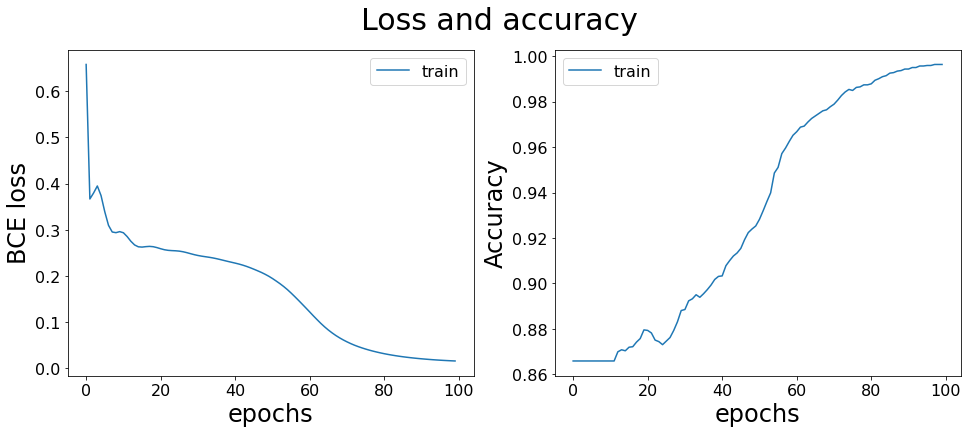

In [96]:
plot_loss_and_accuracy(losses, accs)

<a name="592"></a>
### Avaliação do Modelo no Dataset de Teste

Vamos **avaliar o modelo fazendo previsões sobre o dataset de teste**.

In [97]:
with torch.no_grad():
  y_test_pred = Model(torch.LongTensor(X_test))

A taxa de acerto no teste foi:

In [98]:
test_acc = calc_accuracy(y_test_pred, torch.FloatTensor(Y_test))
print(f'Taxa de acerto no teste: {100*test_acc:3.6f}% de acerto!')

Taxa de acerto no teste: 98.026906% de acerto!


É importante identificarmos, tanto nos exemplos de treino quanto nos exemplos de teste, quais são os casos em que o nosso modelo falha na sua classificação.  

Mais ainda, precisamos entender a diferença entre os erros de:
- **_sneaky spam_**: quando o detector classifica um SPAM erroneamente como uma mensagem legítima (TRUE: $1$ $\to$ Predicted: $0$)
- **_misread messages_**: quando o detector interpreta uma mensagem legítima como SPAM (TRUE: $0$ $\to$ Predicted: $1$).

Vamos inclusive verificar o valor da saída $y$ antes do arredondamento, para repensar se o nosso limiar ($0.5$) está adequado ou se podemos exigir um grau maior (ou menor) de certeza para classificar mensagens como SPAM.

In [99]:
# Primeiro vamos gerar a saída previsa usando o Dataset inteiro (treino e teste)
with torch.no_grad():
  Y_pred_dataset = Model(torch.LongTensor(X))
data['Y_pred'] = torch.squeeze(Y_pred_dataset).numpy() # converte para numpy e adiciona no DataFrame

# tensores 'true' e 'predicted'
y_true_vec = torch.squeeze(torch.FloatTensor(Y))
y_pred_vec = torch.squeeze(torch.round(Y_pred_dataset))


filter             = (y_pred_vec != y_true_vec).numpy()          # todos os erros
sneaky_spam_filter = ((y_true_vec==1) & (y_pred_vec==0)).numpy() # erros de 1 (True) para 0 (predicted)
misread_filter     = ((y_true_vec==0) & (y_pred_vec==1)).numpy() # erros de 0 (True) para 1 (predicted)

print(f'Number of errors: {filter.sum()} \n')
print(f'Number of sneaky spam: {sneaky_spam_filter.sum()} \n')
print(f'Number of misread messages: {misread_filter.sum()} \n')

Number of errors: 38 

Number of sneaky spam: 32 

Number of misread messages: 6 



Vamos ler as mensagens legítimas que foram classificadas como SPAM:

In [100]:
print('Misread Messages: \n')
for s, y_true, y_pred in data[misread_filter][['e-mails', 'y', 'Y_pred']].values:
  print(f'true: {y_true}, output: {y_pred:2.4f} in sentence: \n {s}')
  print()



Misread Messages: 

true: 0, output: 0.8522 in sentence: 
 So there's a ring that comes with the guys costumes. It's there so they can gift their future yowifes. Hint hint

true: 0, output: 0.9260 in sentence: 
 Misplaced your number and was sending texts to your old number. Wondering why i've not heard from you this year. All the best in your mcat. Got this number from my atlanta friends

true: 0, output: 0.5567 in sentence: 
 Hi Chachi tried calling u now unable to reach u .. Pl give me a missed cal once u c tiz msg  Kanagu

true: 0, output: 0.9410 in sentence: 
 We are pleased to inform that your application for Airtel Broadband is processed successfully. Your installation will happen within 3 days.

true: 0, output: 0.8926 in sentence: 
 Sir, i am waiting for your call, once free please call me.

true: 0, output: 0.5046 in sentence: 
 Dear Sir,Salam Alaikkum.Pride and Pleasure meeting you today at the Tea Shop.We are pleased to send you our contact number at Qatar.Rakhesh an Indian

E agora vamos ler as mensagens de SPAM que conseguiram "burlar" nosso classificador automático.
> **Aviso Legal**: esse dataset possui mensagens de SPAM com linguagem ou palavras que podem ser consideradas vulgares, profanas ou ofensivas para alguns leitores.

In [101]:
print('Printing Sneaky SPAM: \n')
for s, y_true, y_pred in data[sneaky_spam_filter][['e-mails', 'y', 'Y_pred']].values:
  print(f'true: {y_true}, output: {y_pred:2.4f} in sentence: \n {s}')
  print()

Printing Sneaky SPAM: 

true: 1, output: 0.2391 in sentence: 
 Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES

true: 1, output: 0.2962 in sentence: 
 Update_Now - Xmas Offer! Latest Motorola, SonyEricsson & Nokia & FREE Bluetooth! Double Mins & 1000 Txt on Orange. Call MobileUpd8 on 08000839402 or call2optout/F4Q=

true: 1, output: 0.0088 in sentence: 
 08714712388 between 10am-7pm Cost 10p

true: 1, output: 0.0894 in sentence: 
 Email AlertFrom: Jeri StewartSize: 2KBSubject: Low-cost prescripiton drvgsTo listen to email call 123

true: 1, output: 0.3050 in sentence: 
 Filthy stories and GIRLS waiting for your

true: 1, output: 0.3475 in sentence: 
 URGENT, IMPORTANT INFORMATION FOR O2 USER. TODAY IS YOUR LUCKY DAY! 2 FIND OUT WHY LOG ONTO HTTP://WWW.URAWINNER.COM THERE IS A FANTASTIC SURPRISE AWAITING FOR YOU

true: 1, output: 0.0088 in sentence: 
 Call FREEPHONE 0800 542 0578 now!

true: 1, out

<a name="593"></a>
### Analisando os Word-Embeddings

Agora que nossa rede está treinada, podemos extrair os parâmetros que o modelo ajustou durante o processo de treinamento.  

Os parâmetros que estamos mais interessados, nesse caso, são os vetores de _embedding_ da primeira camada.  

Note que a rede otimizou essa matriz de _embeddings_ a fim de encontrar as melhores representações geométricas das palavras do _corpus_ que auxiliassem na solução do problema apresentado (otimizassem a função custo do classificador). 

In [102]:
for p in Model.embedding.named_parameters():
  print('Camada de embedding:')
  print(p)

Camada de embedding:
('0.weight', Parameter containing:
tensor([[ 0.8623,  1.7364,  0.6959,  ...,  0.3643,  0.1148, -0.6727],
        [-1.2083, -0.0189, -0.7544,  ...,  0.5896, -0.1083, -0.2871],
        [-2.3998, -0.6198, -0.5424,  ..., -0.3341, -1.1268,  1.6870],
        ...,
        [ 1.3236, -1.5672, -0.0663,  ...,  0.7849, -1.3910,  1.6744],
        [ 0.9682,  0.5094,  1.5766,  ...,  1.5436,  0.4050, -1.3042],
        [ 1.4591,  0.8223, -1.2212,  ..., -0.6202,  0.5015,  0.0731]],
       requires_grad=True))


Vamos extrair os valores da matriz e salvar numa array numpy $\mathbf{E}$.

In [103]:
E = list(Model.embedding.parameters())[0].data.numpy()
print(f'Shape da matriz de embedding: {E.shape} = (vocab. size x dim. size)')
print(E)

Shape da matriz de embedding: (7224, 50) = (vocab. size x dim. size)
[[ 0.8622845   1.7363521   0.69593954 ...  0.36425254  0.11483601
  -0.6727438 ]
 [-1.2083205  -0.01887046 -0.7543687  ...  0.5896373  -0.10825501
  -0.28706804]
 [-2.3997543  -0.6198175  -0.54237956 ... -0.3340511  -1.1267915
   1.6869681 ]
 ...
 [ 1.3236334  -1.5672362  -0.06628692 ...  0.7848949  -1.3910111
   1.6744143 ]
 [ 0.9682373   0.5094077   1.5765758  ...  1.5436063   0.40500626
  -1.3042057 ]
 [ 1.4590733   0.8222734  -1.2212082  ... -0.6201727   0.5015232
   0.07305267]]


Veja que usamos um número muito grande para o número de dimensões dos _embeddings_. Ou seja, não é possível visualizar e comparar em um gráfico a localização geométrica desses pontos nesse espaço de dimensão alta ("_high-dimensional_").

> **Algoritmos de redução de dimensionalidade**
> Existem algoritmos que são apropriados para reduzir a dimensionalidade de conjuntos de dados de dimensões altas.  
> 
> O objetivo é extrair uma representação mais "compacta", com "menos features", mas que conserve as principais características da representação original.  
> 
> Obviamente, reduzir a dimensionalidade pode gerar uma perda de informação muito grande, dependendo da "ambição" e das características do problema.  
> 
> Dentre os algoritmos existentes, dois são muito utilizados:
> - **Principal Component Analysis** (PCA)
> - **Singular Value Decomposition** (SVD)
> - **Linear Discriminant Analysis** (LDA)
> - **t-distributed Stochastic Neighbor Embedding** (t-SNE)
> 
> A aplicação de cada um depende da natureza e das propriedades de cada problema. Leia mais sobre esses algoritmos [aqui](https://stackabuse.com/dimensionality-reduction-in-python-with-scikit-learn/#:~:text=The%20primary%20algorithms%20used%20to,into%20the%20machine%20learning%20classifier.) e [aqui](https://towardsdatascience.com/dimension-reduction-techniques-with-python-f36ca7009e5c).

Abaixo vamos fazer uma redução de dimensionalidade com o algoritmo PCA.  
Vamos reduzir os _embeddings_ de $n$ dimensões para $2$, a fim de visualizar a representação geométrica das palavras em um plano cartesiano.  

In [104]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(E)
Embedding_2D = pca.transform(E)

print(f'A matriz dos embeddings originais tinha shape {E.shape}')
print(f'A matriz dos embeddings PCA em 2D tem shape {Embedding_2D.shape}')

A matriz dos embeddings originais tinha shape (7224, 50)
A matriz dos embeddings PCA em 2D tem shape (7224, 2)


Para criar uma visualização dinâmica no caderno do Jupyter, vamos utilizar a biblioteca de visualização gráfica [``bokeh``](https://docs.bokeh.org/en/latest/index.html).  
Navegue pelo gráfico e reflita sobre as semelhanças e diferenças entre as palavras próximas e as distantes. 

In [105]:
#!pip install -q bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

In [106]:
p = figure(plot_width=800, plot_height=600) # objeto do bokeh

# total de palavras para plotar
Nplot = 1000 

# aqui vamos selecionar metade das palavras como sendo as mais comuns do vocabulário
# e a outra metade como sendo as menos comuns

most_common_N  = count_dictionary.most_common(int(Nplot/2))            # N/2 most common elements
least_common_N = count_dictionary.most_common()[:-int(Nplot/2)-1:-1]   # N/2 least common elements

# agrupamos tudo numa lista
common_words = [word2idx[x[0]] for x in most_common_N] + [word2idx[x[0]] for x in least_common_N]


# scatterplot do bokeh:
# -- usamos as linhas do embedding 2D correspondentes às palavras de interesse
# -- a coordenada da coluna 0 vai no eixo horizontal (x) 
# -- a coordenada da coluna 1 vai no eixo   vertical (y)
p.scatter(x=Embedding_2D[common_words,0], y=Embedding_2D[common_words,1])

# rotulamos os pontos (usando a lista idx2word) para saber qual ponto corresponde a qual palavra
for i in common_words:
    my_text = Label(text=idx2word[i], x=Embedding_2D[i,0],y=Embedding_2D[i,1])
    p.add_layout(my_text)
    
# mostra o gráfico na célula
show(p)

<a name="594"></a>
### Palavras Vizinhas no Embedding 

Um problema da redução de dimensionalidade é que ao reduzir o _embedding_ de um número alto de dimensões para apenas $2$, podemos acabar aproximando palavras que não estavam tão próximas no espaço geométrico original.

Vamos então avaliar **as palavras vizinhas mais próximas** no espaço original ($\mathbb{R}^n$) dos _embeddings_. 

A função abaixo vai calcular a distância entre o vetor de _embedding_ de uma palavra especifica $w_i$ contra todos os vetores do _embedding_ (exceto o dela mesma).  
Após isso, vamos ordenar as distâncias da menor para a maior e imprimir as palavras correspondentes as primeiras $n_{\text{closest}}$ palavras, ou seja, os "vizinhos" mais próximos.

In [107]:
from sklearn.metrics.pairwise import pairwise_distances

def closest_words(word, n_closest = 5, embedding=None, word2idx = word2idx, idx2word = idx2word, d_metric='cosine', print_flag=True):
  ''' Encontra as palavras mais próximas da entrada (word) no embedding correspondente.

  Entradas:
  - word: palavra de referência
  - n_closets: quantos vizinhos imprimir
  - embedding: matriz de embedding (V x D)
  - word2idx: dicionário que converte de palavra para índice
  - idx2word: lista de palavras do vocabulário na ordem correspondente aos seus índices
  - d_metric: string correspondente à métrica de distância utilizada (default: 'cosine')
  - print_flag: para imprimir os resultados ou não

  Saída:
  - lista das palavras encontradas
  '''
  
  V, D = embedding.shape # leitura das dimensões do embedding

  # converte a palavra de referência --> vetor de embedding
  if word in word2idx:
    vec = embedding[word2idx[word]].reshape(1, -1) # reshape para garantir 2-dimensões
  else:
    print(f'Palavra "{word}" não está no dicionário')
    return [None]

  # todas as distâncias entre vec e os vetores do embedding
  distances = pairwise_distances(vec, embedding, 
                                   metric=d_metric).reshape(V) # reshape para 1 dimensão
    
  # ordena o índice dos embeddings da menor para a maior distância
  # e seleciona n_closets+1 índices
  idx = distances.argsort()[:n_closest+1]         # uma a mais, porque a primeira com certeza é o embedding de referência
  idx = [x for x in idx if x != word2idx[word]]   # remove o embedding de referência (outra forma seria idx = idx[1:])
 
  # imprime resultados
  if print_flag:
    print(f'As {len(idx)} palavras mais próximas de "{word}":')          
    for i in idx:
      print(f'{idx2word[i]}')
    print()
  
  # retorna palavras encontradas
  return [idx2word[i] for i in idx]

Vamos testar a função com algumas palavras da lista abaixo.

In [108]:
lista_de_palavras = ['free', 'call', 'reply', 'today', 'card', 'mobile', 'txt', 'dollars', 'pay', 'attach', 'link']

In [109]:
listas_de_vizinhos = []
for palavra in lista_de_palavras:
  vizinhos_de_palavra = closest_words(palavra, n_closest=10, 
                                      embedding=E, 
                                      word2idx=word2idx, idx2word=idx2word)
  listas_de_vizinhos.append(vizinhos_de_palavra)

As 10 palavras mais próximas de "free":
conditions
flights
national
contact
quality
sale
sexy
reply
callcost
ldew

As 10 palavras mais próximas de "call":
begin
canname
video
shsex
top
summer
saucy
gudnyt
offering
weekly

As 10 palavras mais próximas de "reply":
subscription
video
connected
charges
adult
chg
ringtoneking
received
improved
worlds

As 10 palavras mais próximas de "today":
centre
tiring
impatient
whole
ringing
middle
adds
remember
kano
recognises

As 10 palavras mais próximas de "card":
addicted
spatula
wine
naughty
booked
teaching
hurts
dude
captain
covers

As 10 palavras mais próximas de "mobile":
video
new
top
ads
allow
stories
http
newest
spree
offering

As 10 palavras mais próximas de "txt":
svc
visionsms
mustprovide
area
price
fancy
secs
pause
team
gprs

As 10 palavras mais próximas de "dollars":
mei
cause
swoop
opted
dangerous
arrived
recognise
tht
dead
goodmate

As 10 palavras mais próximas de "pay":
sure
quick
dangerous
paru
somtimes
hoping
planned
dead
settled
s

Agora confira os vizinhos das mesmas palavras calculados em relação à representação em $2$-D (duas dimensões) no _embedding_ gerado pelo PCA:

In [110]:
listas_de_vizinhos_2D = []
for palavra in lista_de_palavras:
  vizinhos_de_palavra = closest_words(palavra, n_closest=10, 
                                      embedding=Embedding_2D, 
                                      word2idx=word2idx, idx2word=idx2word)
  listas_de_vizinhos_2D.append(vizinhos_de_palavra)

As 10 palavras mais próximas de "free":
access
message
maat
alle
craving
careers
everywhere
brought
girlfrnd
boyfriend

As 10 palavras mais próximas de "call":
deny
callcost
promptly
disaster
peak
subject
beauty
learn
txting
splat

As 10 palavras mais próximas de "reply":
howz
speedchat
british
using
textpod
sapna
brown
readers
tke
wrking

As 10 palavras mais próximas de "today":
barrel
download
stressful
nowadays
mention
thanx
outreach
till
hat
deepest

As 10 palavras mais próximas de "card":
witot
sweater
dnot
missin
irulinae
snake
lion
gate
dha
jog

As 10 palavras mais próximas de "mobile":
brandy
rto
click
ladies
sexy
cyclists
servs
reward
heading
guaranteed

As 10 palavras mais próximas de "txt":
waliking
monos
loyalty
aww
nic
asp
splat
txting
learn
beauty

As 10 palavras mais próximas de "dollars":
program
missions
connections
falls
valuable
sources
transport
tightly
recognise
purchases

As 10 palavras mais próximas de "pay":
shower
cstore
abusers
kittum
rakhesh
canlove
underwear